In [5]:
# Data manipulation and numerical operations
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns            # For statistical data visualization

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposing time series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For plotting autocorrelation functions
from scipy.stats import skew, kurtosis  # For statistical analysis (skewness and kurtosis)

# Machine learning libraries
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.impute import SimpleImputer  # For handling missing data
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline

# Set visualization style
# %matplotlib inline  # Enable inline plotting in Jupyter notebooks
sns.set(color_codes=True)  # Set the seaborn color codes for better aesthetics

# Google Colab specific
from google.colab import drive  # For mounting Google Drive in Colab
drive.mount('/content/drive')  # Mount Google Drive to access files

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/CAMEL_ML_internal/camel_ml_df.csv')

#EDA

In [21]:
print(list(df))

['gauge_id', 'date', 'dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp', 'streamflow', 'lon_cen', 'lat_cen']


In [ ]:
# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
gauge_stations = [1415000, 1414500, 1434025, 1350140, 1510000]

# Subset the dataframe for the specified gauge stations
subset_df = df[df['gauge_id'].isin(gauge_stations)]

In [ ]:
df = subset_df.copy()

In [ ]:
df

gauge_id      dayl  prcp    srad  swe   tmax   tmin      vp  \
date                                                                      
1984-01-12   1350140  32832.00  0.00  270.33    0 -12.60 -27.70   68.73   
1984-01-03   1350140  32408.35  0.00   71.64    0  -3.33  -6.41  368.67   
1984-01-02   1350140  32140.80  0.00  182.22    0  -3.02 -11.90  244.08   
1984-01-11   1350140  32832.00  8.71  190.89    0  -3.61 -17.25  159.70   
1984-01-04   1350140  32486.40  0.00  103.61    0  -0.37  -5.05  435.05   
...              ...       ...   ...     ...  ...    ...    ...     ...   
2006-10-27   1510000  36979.19  3.26  164.87    0   3.99  -3.23  479.42   
2007-02-25   1510000  38707.20  0.00  379.97    0  -5.25 -14.47  199.82   
2007-02-26   1510000  39052.80  3.00  327.86    0  -0.32 -12.15  243.99   
2007-02-27   1510000  39052.80  2.74  133.92    0  -0.73  -4.05  447.44   
2006-10-26   1510000  36979.19  4.07  120.02    0   4.78  -0.50  589.83   

            streamflow   lon_cen   lat_cen  
date                                        
1984-01-12         8.0 -74.53833  42.44596  
1984-01-03        15.0 -74.53833  42.44596  
1984-01-02        18.0 -74.53833  42.44596  
1984-01-11         8.6 -74.53833  42.44596  
1984-01-04        15.0 -74.53833  42.44596  
...                ...       ...       ...  
2006-10-27       461.0 -75.80821  42.68791  
2007-02-25        70.0 -75.80821  42.68791  
2007-02-26        70.0 -75.80821  42.68791  
2007-02-27        70.0 -75.80821  42.68791  
2006-10-26       572.0 -75.80821  42.68791  

[60654 rows x 11 columns]

In [ ]:
# Create a dictionary to store the dataframes
dataframes = {gauge_id: df[df['gauge_id'] == gauge_id] for gauge_id in gauge_stations}

# Export each dataframe as CSV and display them
for gauge_id, dataframe in dataframes.items():
    csv_data = dataframe.to_csv(index=False)
    print(f"Gauged Station: {gauge_id}")
    print(csv_data)

In [ ]:
df[['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp', 'streamflow']].describe()

dayl          prcp          srad        swe          tmax  \
count  8.369019e+06  8.369019e+06  8.369019e+06  8369019.0  8.369019e+06   
mean   4.321710e+04  3.238278e+00  3.409989e+02        0.0  1.665841e+01   
std    7.144215e+03  7.745364e+00  1.314576e+02        0.0  1.116247e+01   
min    2.901251e+04  0.000000e+00  1.305000e+01        0.0 -3.807000e+01   
25%    3.663361e+04  0.000000e+00  2.427200e+02        0.0  8.270000e+00   
50%    4.320000e+04  0.000000e+00  3.431300e+02        0.0  1.778000e+01   
75%    4.976639e+04  2.820000e+00  4.388400e+02        0.0  2.565000e+01   
max    5.738758e+04  2.000000e+02  8.000000e+02        0.0  4.550000e+01   

               tmin            vp    streamflow  
count  8.369019e+06  8.369019e+06  8.369019e+06  
mean   4.234825e+00  9.543840e+02  3.187033e+02  
std    1.017990e+01  6.554638e+02  1.194341e+03  
min   -4.884000e+01  0.000000e+00  0.000000e+00  
25%   -2.490000e+00  4.656000e+02  8.800000e+00  
50%    4.180000e+00  7.447600e+02  5.000000e+01  
75%    1.188000e+01  1.317290e+03  2.050000e+02  
max    2.850000e+01  3.659250e+03  1.240000e+05

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

gauge_id      0.0
dayl          0.0
prcp          0.0
srad          0.0
swe           0.0
tmax          0.0
tmin          0.0
vp            0.0
streamflow    0.0
dtype: float64


Time Series Visualization

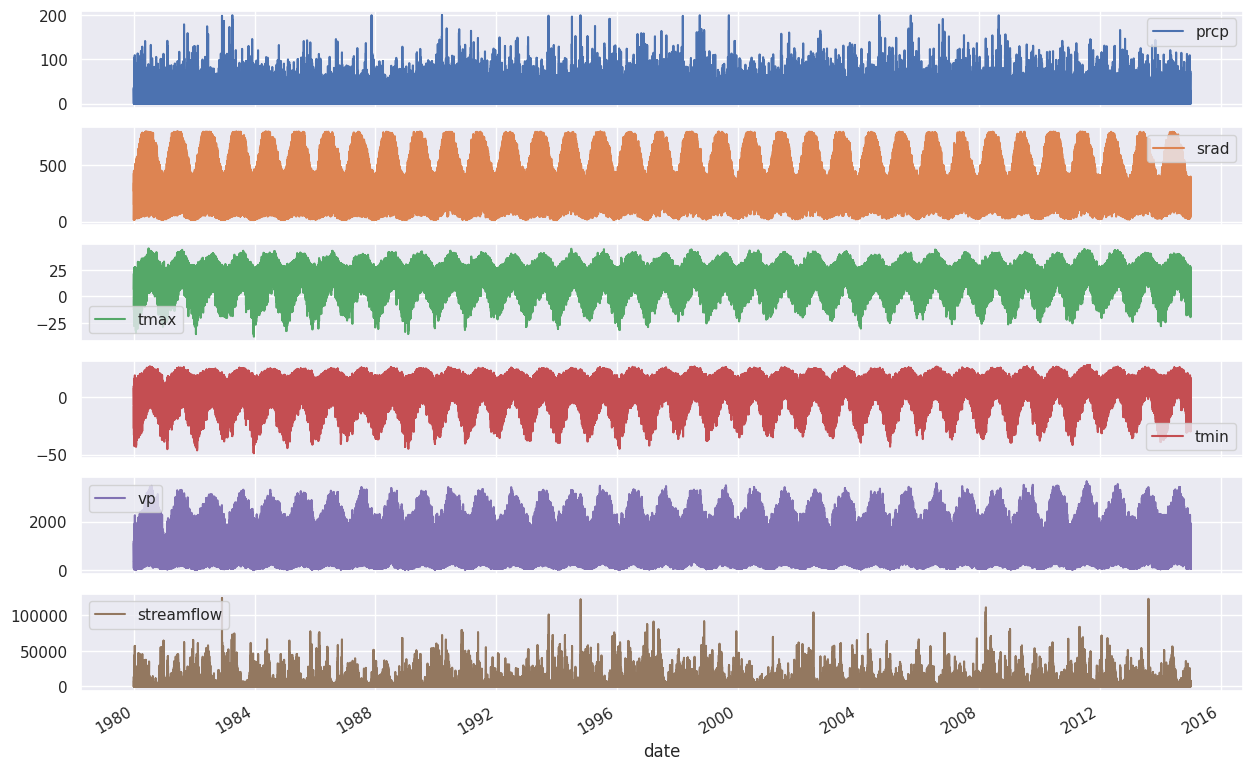

In [ ]:
# Time Series Visualization
df[['prcp', 'srad', 'tmax', 'tmin', 'vp', 'streamflow']].plot(subplots=True, figsize=(15, 10))
plt.show()

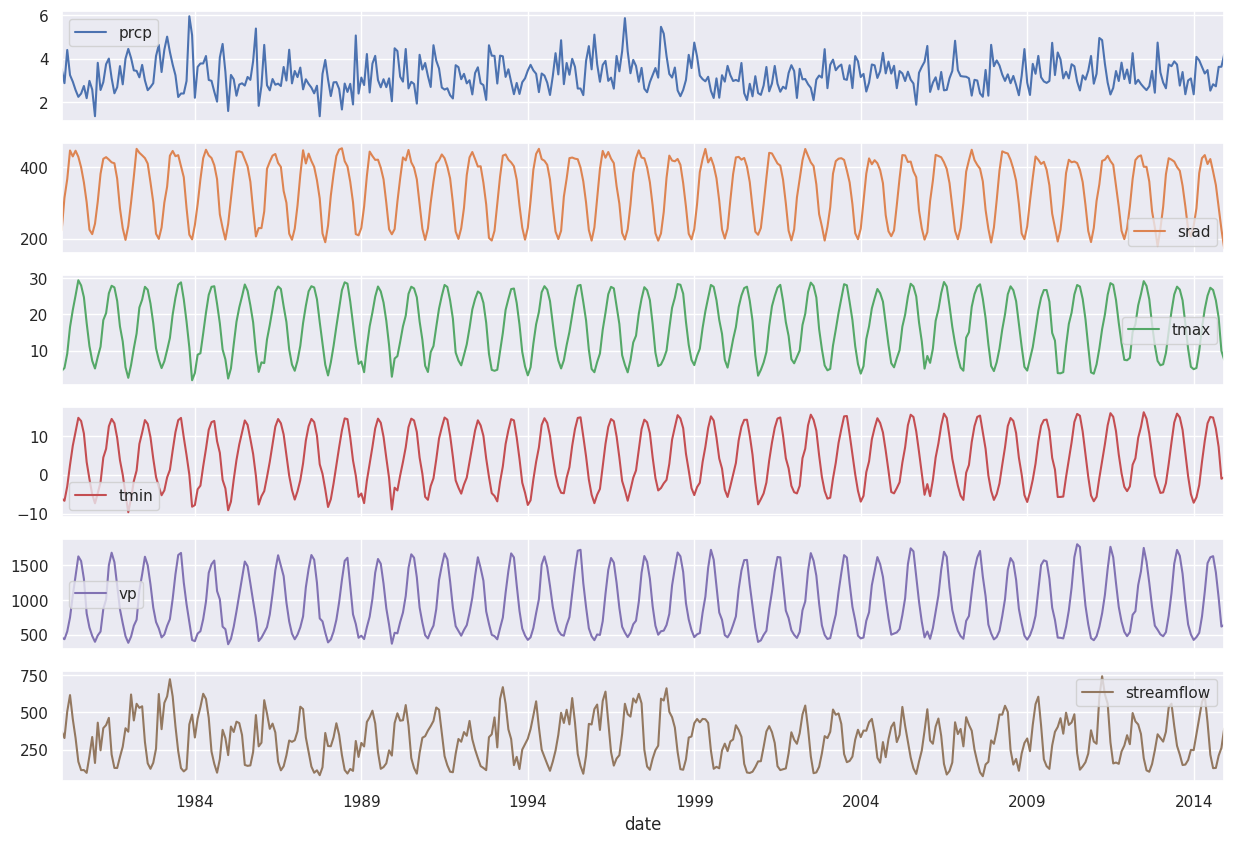

In [ ]:
# Aggregate data by month and plot
monthly_df = df.resample('M').mean()
monthly_df[['prcp', 'srad', 'tmax', 'tmin', 'vp', 'streamflow']].plot(subplots=True, figsize=(15, 10))
plt.show()

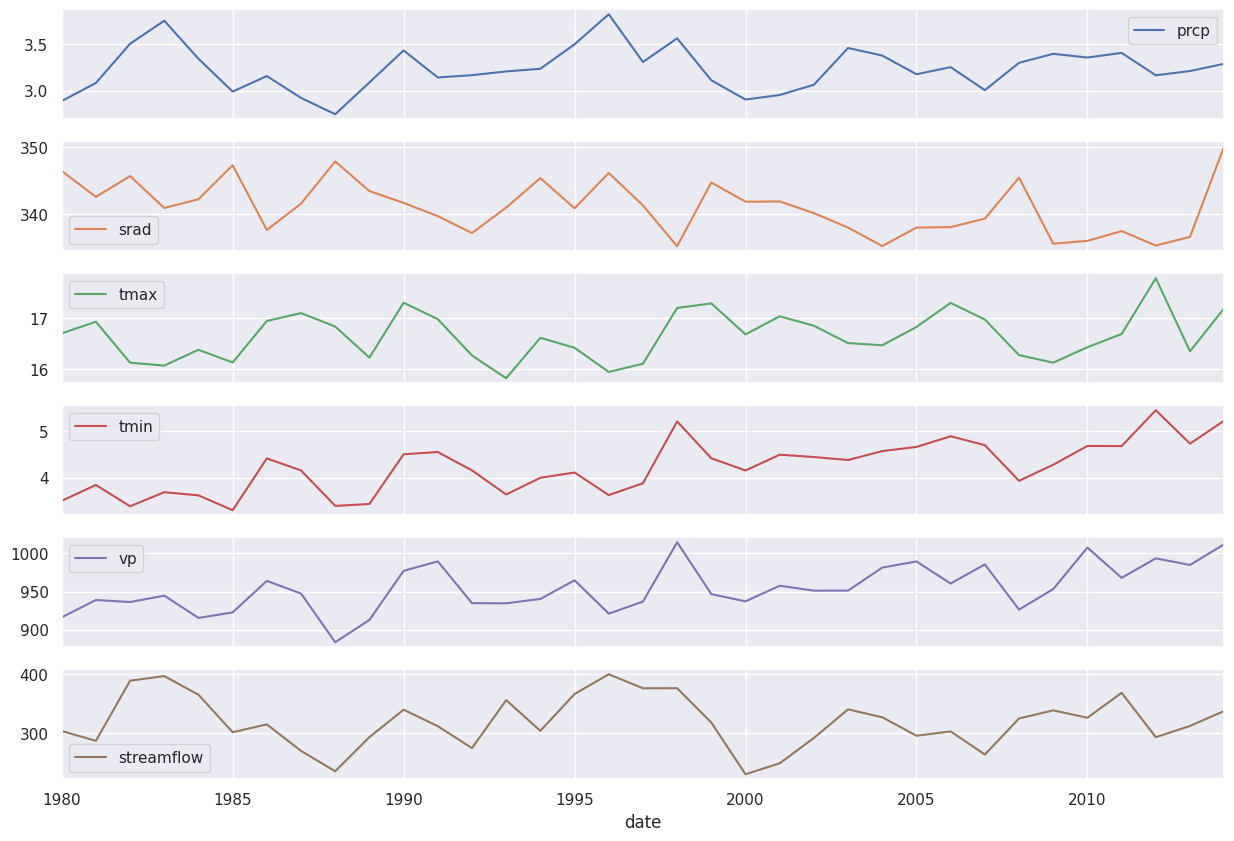

In [ ]:
# Aggregate data by yearly and plot
yearlyly_df = df.resample('Y').mean()
yearlyly_df[['prcp', 'srad', 'tmax', 'tmin', 'vp', 'streamflow']].plot(subplots=True, figsize=(15, 10))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


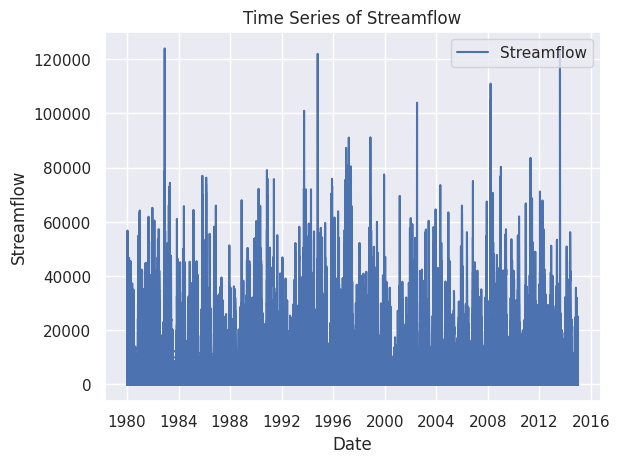

In [ ]:
# Plot the time series of streamflow
plt.plot(df['streamflow'], label='Streamflow')
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title('Time Series of Streamflow')
plt.legend()
plt.show()

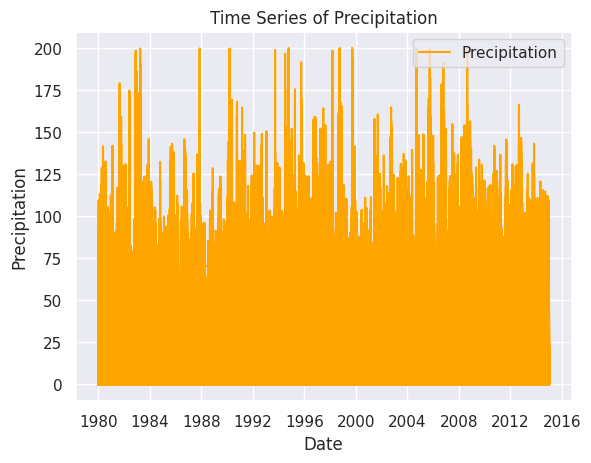

In [ ]:
plt.plot(df['prcp'], label='Precipitation', color='orange')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Time Series of Precipitation')
plt.legend()
plt.show()

Statistical Analysis

In [ ]:
df[['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp', 'streamflow']].corr()

dayl      prcp      srad  swe      tmax      tmin        vp  \
dayl        1.000000 -0.037214  0.639256  NaN  0.649407  0.614072  0.513705   
prcp       -0.037214  1.000000 -0.392916  NaN -0.064662  0.077814  0.096502   
srad        0.639256 -0.392916  1.000000  NaN  0.487454  0.227113  0.120524   
swe              NaN       NaN       NaN  NaN       NaN       NaN       NaN   
tmax        0.649407 -0.064662  0.487454  NaN  1.000000  0.919381  0.785440   
tmin        0.614072  0.077814  0.227113  NaN  0.919381  1.000000  0.897263   
vp          0.513705  0.096502  0.120524  NaN  0.785440  0.897263  1.000000   
streamflow  0.010018  0.235880 -0.058434  NaN -0.066459 -0.028987 -0.035264   

            streamflow  
dayl          0.010018  
prcp          0.235880  
srad         -0.058434  
swe                NaN  
tmax         -0.066459  
tmin         -0.028987  
vp           -0.035264  
streamflow    1.000000

Prompt: I have a multivariate time series dataset, df with one target and multiple inputs. The data are collected at different location and have site IDs. At each site, there are mutiple observations of the variables. Now, give me a plot showing the correlation of each input with the output for each storm. Consider inputs 'dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp' and target 'streamflow'. Site ID is 'gauge_id'.    

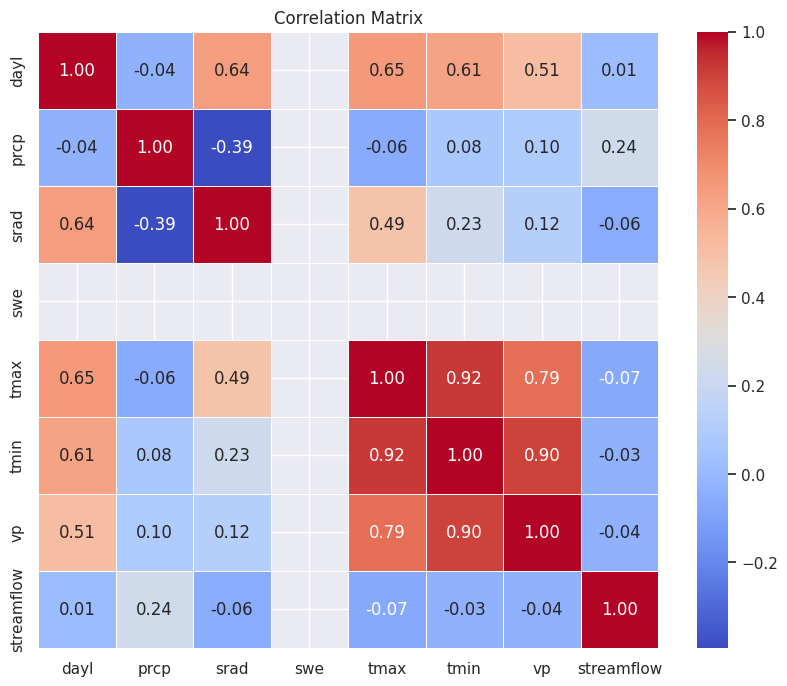

In [ ]:
input_vars = ['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp', 'streamflow']

# Calculate the correlation matrix
corr_matrix = df[input_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

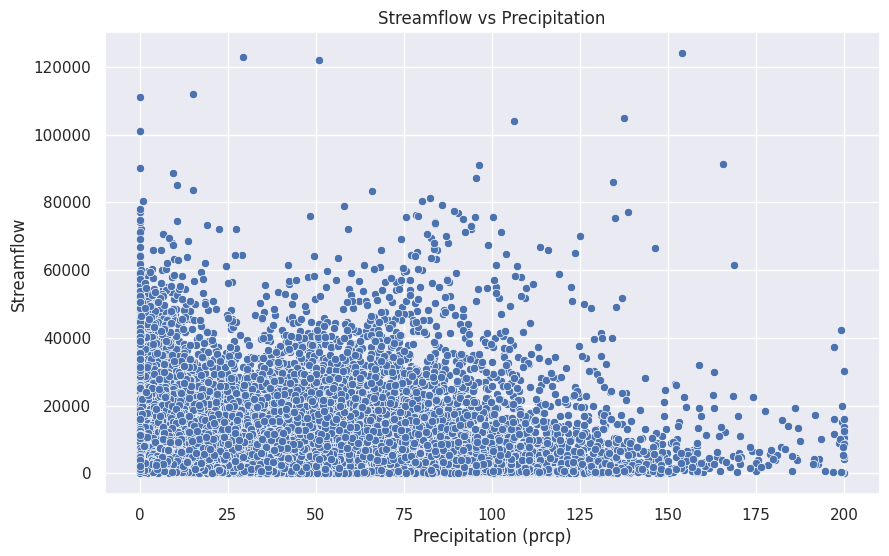

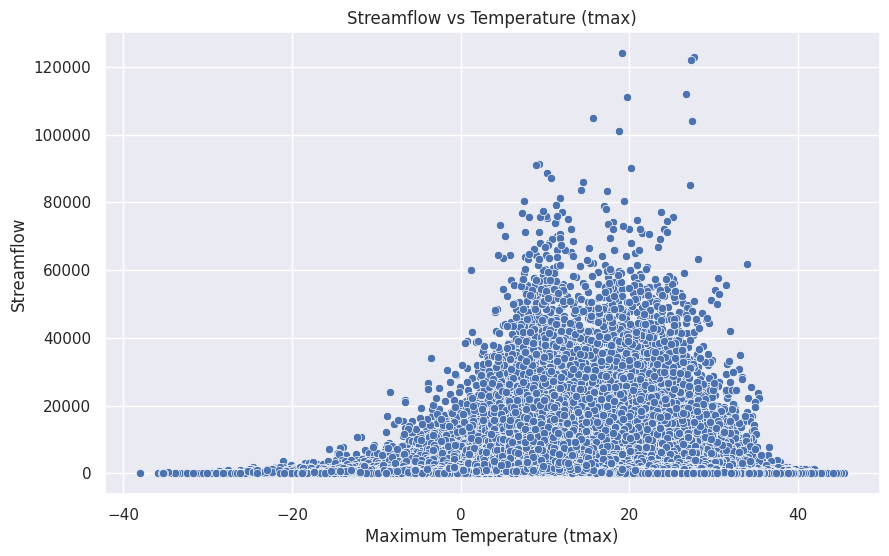

In [ ]:
# Define the specific variables for plotting
vars_to_plot = ['streamflow', 'prcp', 'tmax']

# Plot streamflow vs prcp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='prcp', y='streamflow')
plt.title('Streamflow vs Precipitation')
plt.xlabel('Precipitation (prcp)')
plt.ylabel('Streamflow')
plt.show()

# Plot streamflow vs tmax
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tmax', y='streamflow')
plt.title('Streamflow vs Temperature (tmax)')
plt.xlabel('Maximum Temperature (tmax)')
plt.ylabel('Streamflow')
plt.show()

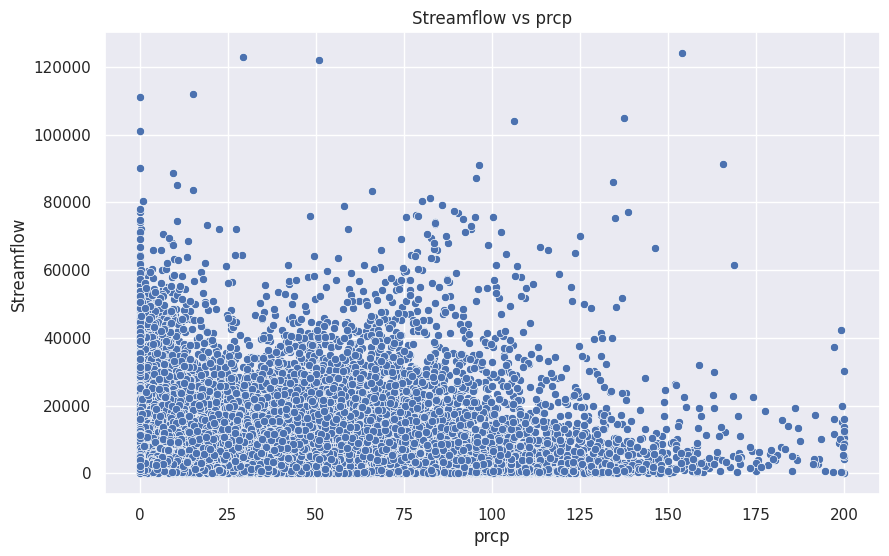

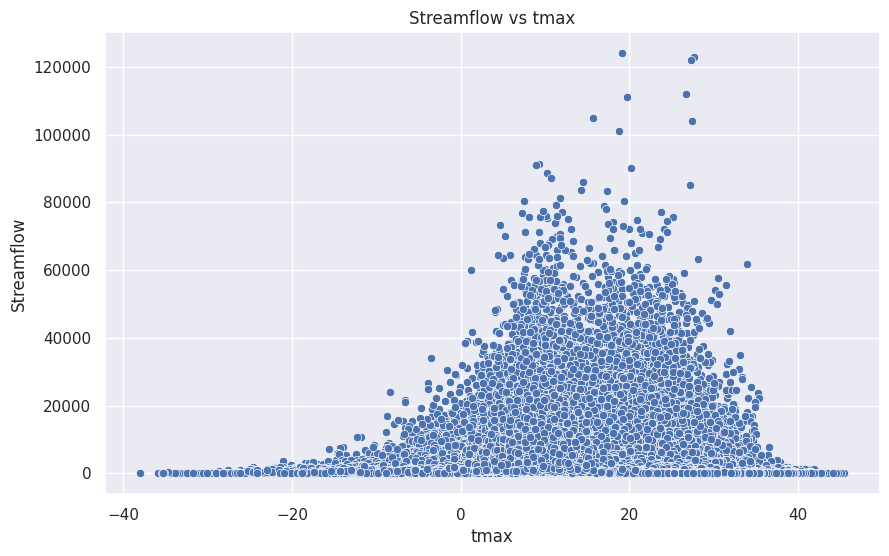

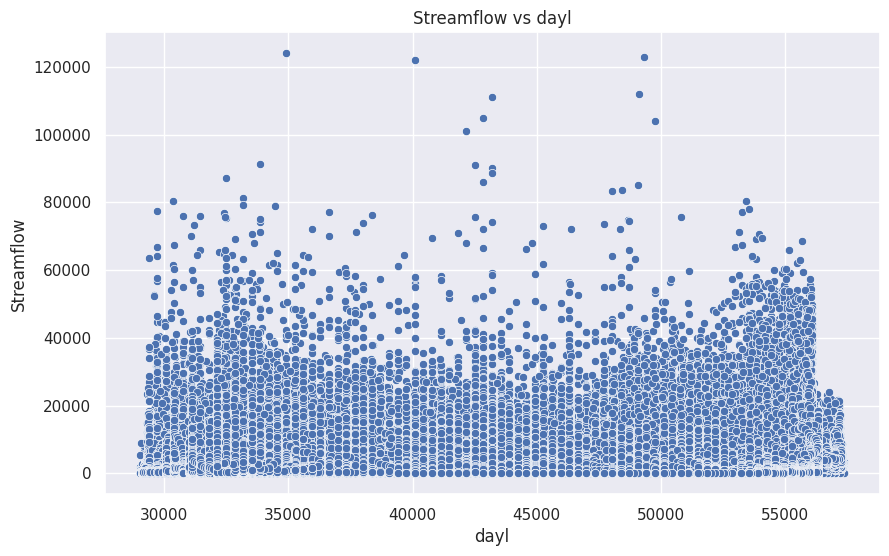

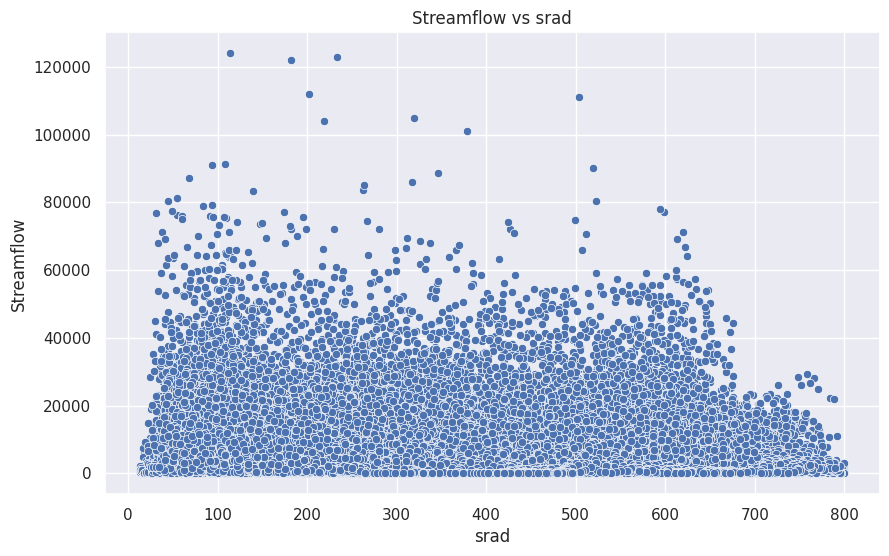

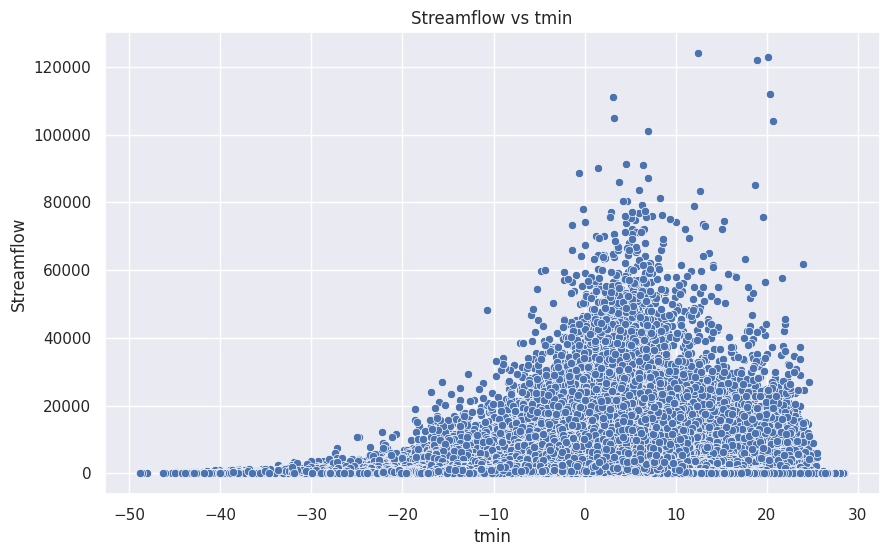

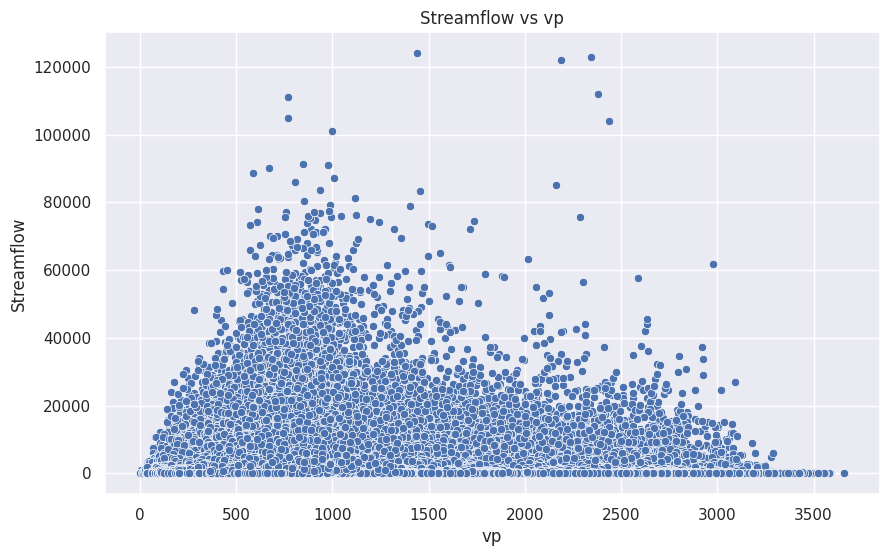

In [ ]:
# Define the specific variables for plotting
variables = ['prcp', 'tmax', 'dayl', 'srad', 'tmin', 'vp']

# Create scatter plots
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='streamflow')
    plt.title(f'Streamflow vs {var}')
    plt.xlabel(var)
    plt.ylabel('Streamflow')
    plt.show()

Distribution Analysis

In [ ]:
df_1 = df[['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp', 'streamflow']]

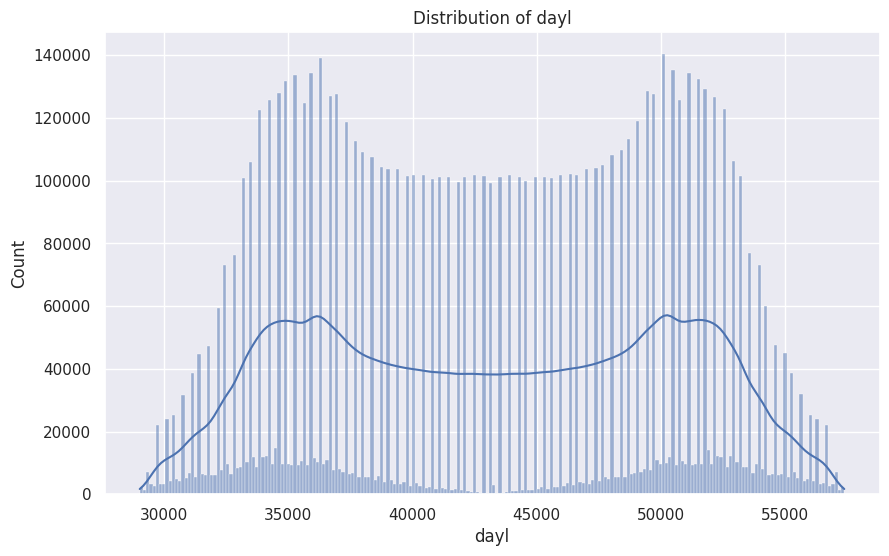

Skewness of dayl: -0.0033763650812226238
Kurtosis of dayl: -1.2388037741141187


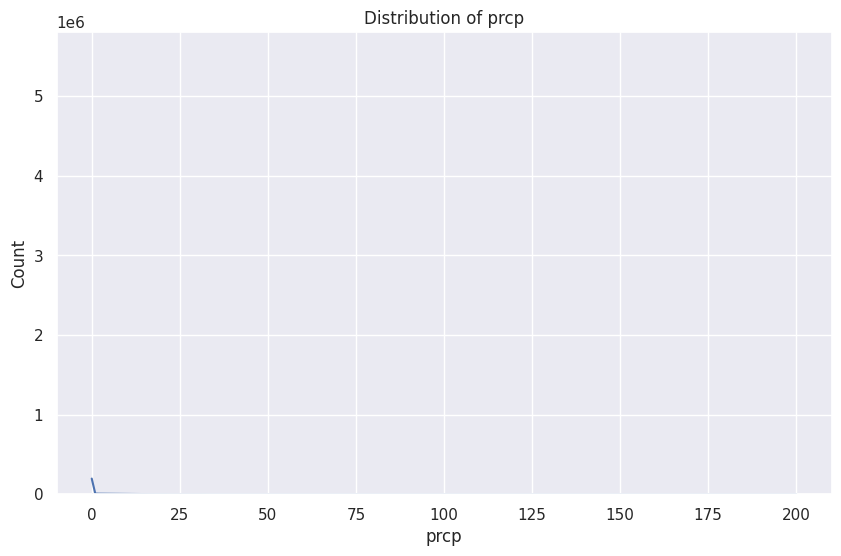

Skewness of prcp: 4.502318347630583
Kurtosis of prcp: 33.625193293811314


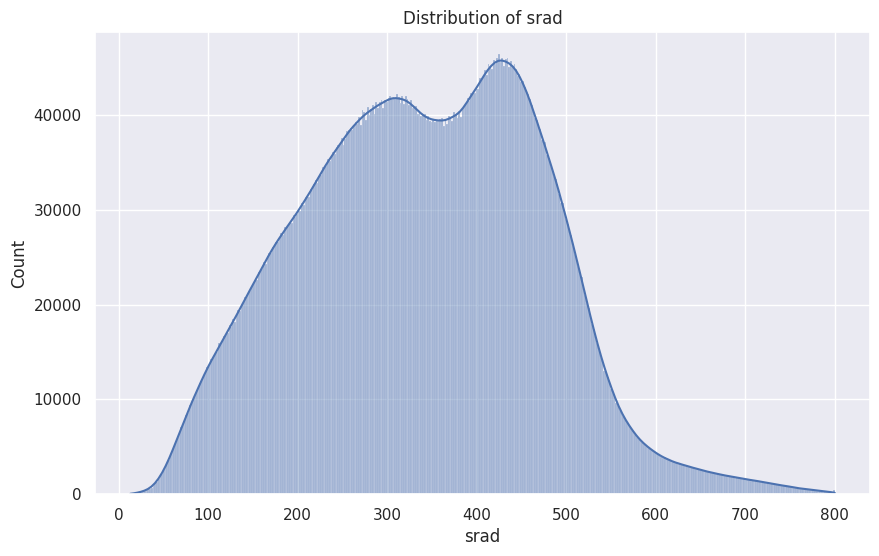

Skewness of srad: 0.08054942087956542
Kurtosis of srad: -0.3875186166973106


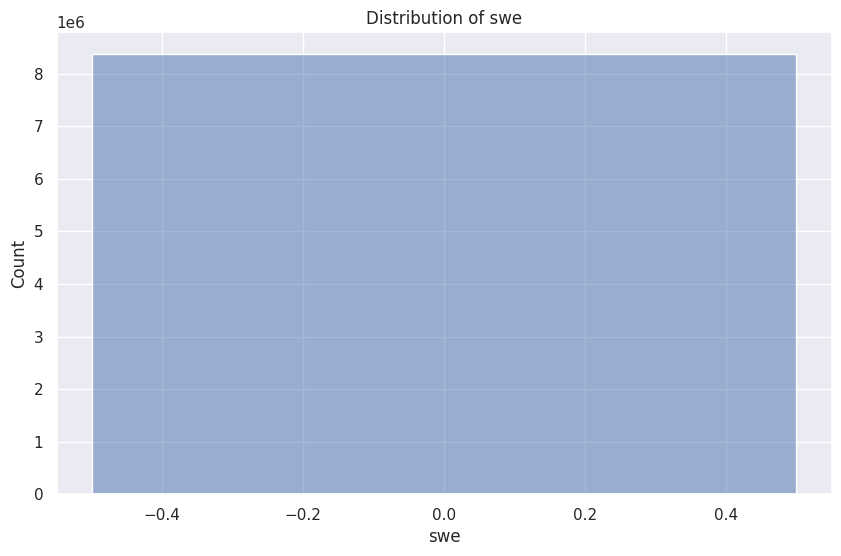

Skewness of swe: nan
Kurtosis of swe: nan


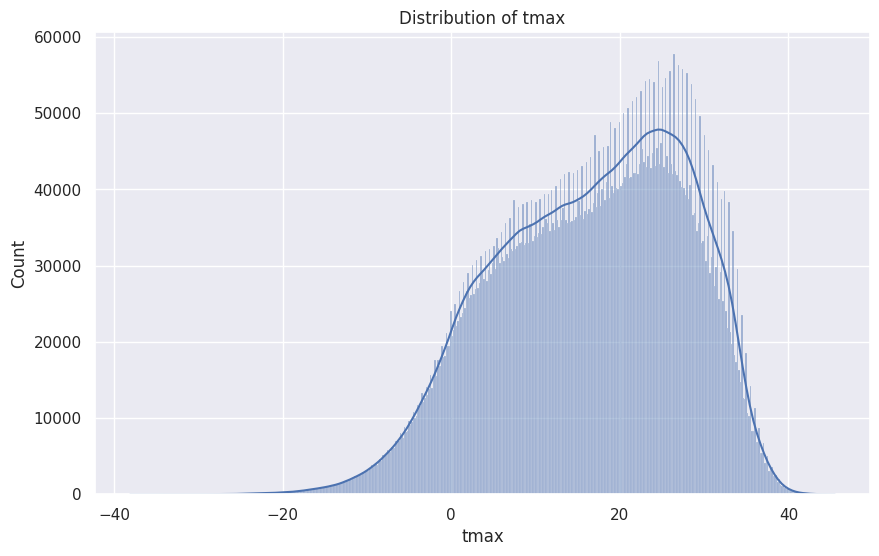

Skewness of tmax: -0.3457757263512233
Kurtosis of tmax: -0.5864560278601414


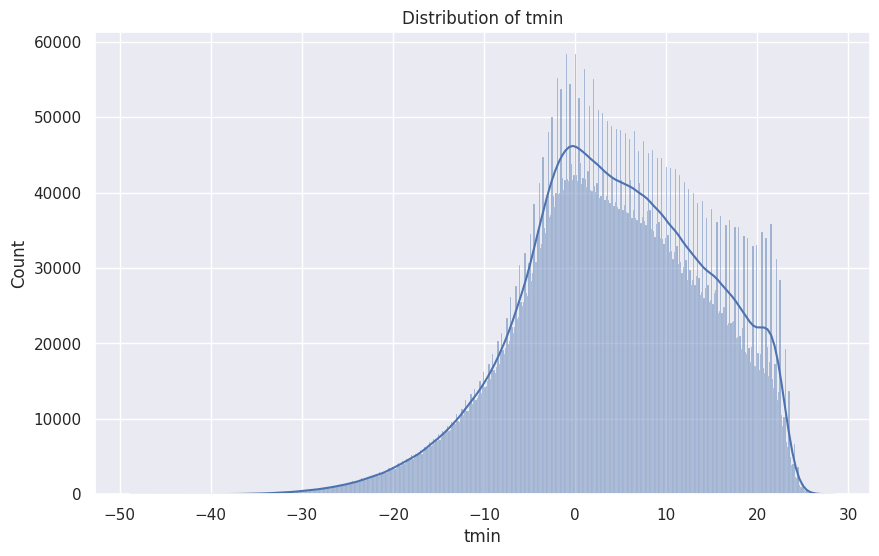

Skewness of tmin: -0.2859894023120493
Kurtosis of tmin: -0.1580503948588592


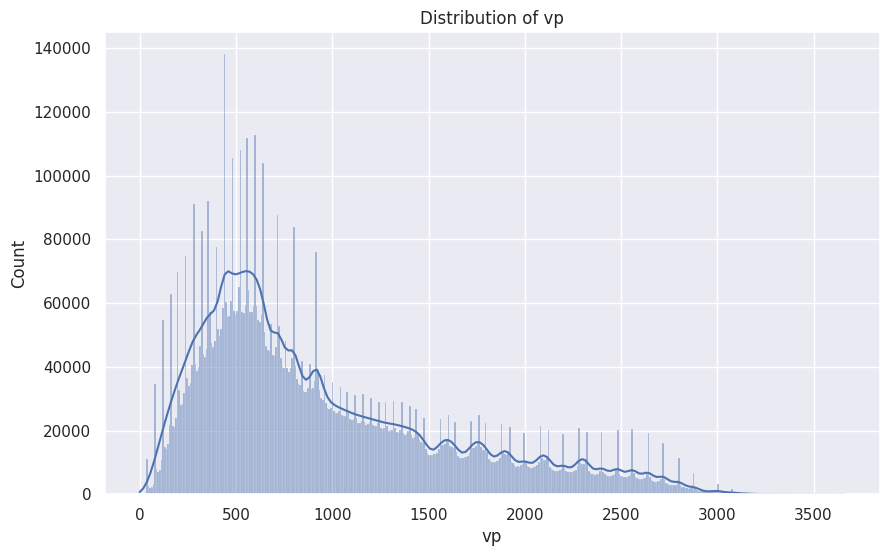

Skewness of vp: 1.0280547607221628
Kurtosis of vp: 0.26823396943254263


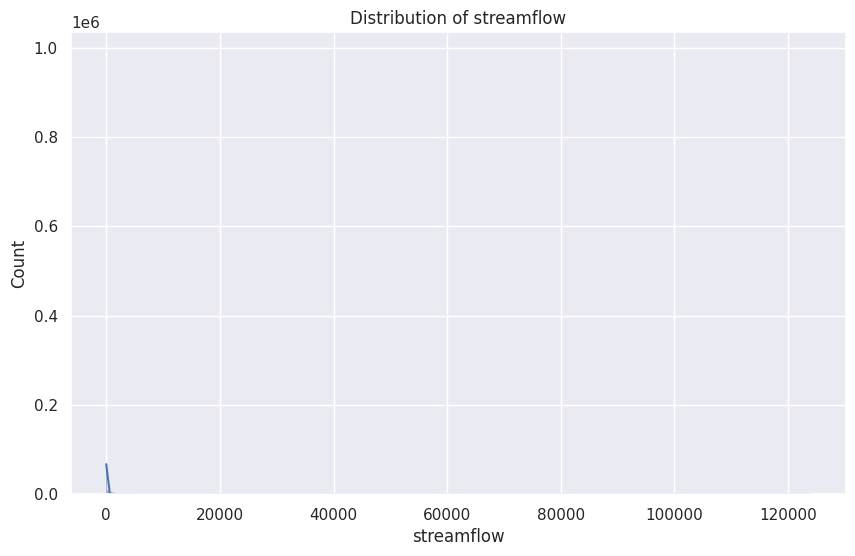

Skewness of streamflow: 17.015019458394
Kurtosis of streamflow: 573.1402646553961


In [ ]:
# Distribution Analysis
for column in df_1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    print(f'Skewness of {column}: {skew(df_1[column])}')
    print(f'Kurtosis of {column}: {kurtosis(df_1[column])}')

In [ ]:
#Display first ten unique values of a column.
unique_values = df['gauge_id'].unique()[:10]
print(unique_values)

[1013500 1022500 1030500 1031500 1047000 1052500 1054200 1055000 1057000
 1073000]


In [ ]:
number_of_unique_gauge_ids = df['gauge_id'].nunique()

print(f"The number of unique gauge IDs is: {number_of_unique_gauge_ids}")

The number of unique gauge IDs is: 84


In [ ]:
# Specific values to subset
#values_to_subset = [1013500, 1022500, 1030500, 1031500, 1047000, 1052500, 1054200, 1055000, 1057000, 1073000]
values_to_subset = [1013500]

# Subset DataFrame
subset_df = df[df['gauge_id'].isin(values_to_subset)]

<Axes: >

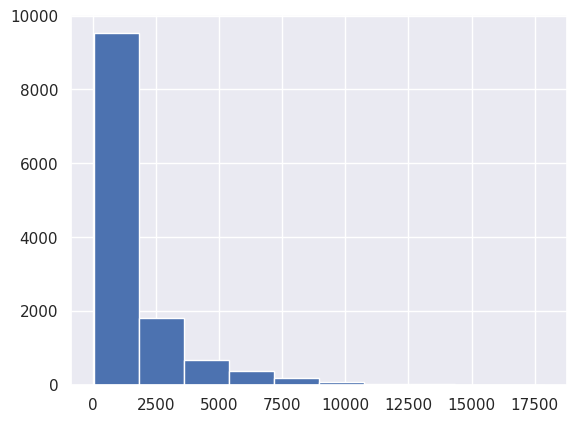

In [ ]:
subset_df['streamflow'].hist()

In [ ]:
#How can I check if the time series has regular interval?
subset_df

gauge_id        date      dayl  prcp    srad  swe   tmax   tmin  \
0       1013500  1980-01-01  30172.51  0.00  153.40    0  -6.54 -16.30   
1       1013500  1980-01-02  30253.10  0.00  145.27    0  -6.18 -15.22   
2       1013500  1980-01-03  30344.18  0.00  146.96    0  -9.89 -18.86   
3       1013500  1980-01-04  30408.33  0.00  146.20    0 -10.98 -19.76   
4       1013500  1980-01-05  30413.48  0.00  170.43    0 -11.29 -22.21   
...         ...         ...       ...   ...     ...  ...    ...    ...   
12687   1013500  2014-09-26  42163.23  0.00  353.21    0  22.94   6.94   
12688   1013500  2014-09-27  41817.62  0.00  313.64    0  22.57   9.53   
12689   1013500  2014-09-28  41616.29  0.00  341.55    0  26.01   9.66   
12690   1013500  2014-09-29  41472.05  2.91  255.65    0  17.53   5.48   
12691   1013500  2014-09-30  41126.41  0.00  181.73    0   9.23   3.12   

            vp  streamflow  
0       171.69       655.0  
1       185.94       640.0  
2       138.39       625.0  
3       120.06       620.0  
4       117.87       605.0  
...        ...         ...  
12687   995.08       207.0  
12688  1202.24       200.0  
12689  1212.80       196.0  
12690   904.53       189.0  
12691   766.73       205.0  

[12692 rows x 10 columns]

In [ ]:
df = subset_df.copy()

In [ ]:
df['gauge_id'].nunique()

674

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df.set_index('date')

##Map

Prompt: I have a dataset that consists of a multivariate time series of hydrologic variables, which is depicted in the attached picture. The dataset includes multiple gauge stations identified by their Gauge IDs, and each station has multiple observations of various variables. Could you please provide a code to calculate the median streamflow for each unique gauge station? In the end, I would like to have a dataset containing all unique gauge stations along with the median values of their respective variables.

In [ ]:
import pandas as pd

# Group by 'gauge_id' and calculate the median for each group
median_df = df.groupby('gauge_id').median().reset_index()
median_df

max_df = df.groupby('gauge_id').max().reset_index()
max_df

gauge_id      dayl    prcp    srad  swe   tmax   tmin       vp  \
0     1013500  56534.20   58.15  717.29    0  33.27  20.58  2413.30   
1     1022500  55411.63   93.16  675.64    0  34.18  20.23  2356.52   
2     1030500  55902.08   79.54  704.45    0  34.35  20.72  2435.93   
3     1031500  55641.59   83.44  707.84    0  34.45  21.00  2480.21   
4     1047000  55608.45   94.28  707.35    0  34.07  20.54  2407.21   
..        ...       ...     ...     ...  ...    ...    ...      ...   
669  14309500  54604.80  133.31  575.14    0  32.55  18.31  1923.02   
670  14316700  54950.32  105.87  588.53    0  37.89  18.05  1867.37   
671  14325000  54604.79  158.75  578.21    0  31.76  16.60  1884.46   
672  14362250  54259.20   90.39  566.53    0  37.38  18.54  1738.99   
673  14400000  54259.20  131.19  578.75    0  32.02  17.82  2012.10   

     streamflow    lon_cen   lat_cen  
0       17900.0  -68.56551  47.01169  
1        6790.0  -68.07313  44.79691  
2       25900.0  -68.14985  45.80527  
3       31700.0  -69.58119  45.23568  
4       36000.0  -70.16213  44.98744  
..          ...        ...       ...  
669      7180.0 -123.74216  42.83017  
670     16700.0 -122.64677  43.45290  
671     19400.0 -124.02763  42.79249  
672       621.0 -123.12535  42.16583  
673     57000.0 -124.00527  42.23303  

[674 rows x 11 columns]

In [ ]:
max_df = max_df.dropna()

In [ ]:
import folium
import geopandas as gpd
import branca.colormap as cm

# Assuming max_df is already defined
# Create a GeoDataFrame
gmax_df = gpd.GeoDataFrame(max_df, geometry=gpd.points_from_xy(max_df['lon_cen'], max_df['lat_cen']))

# Create a colormap for streamflow values
colormap = cm.linear.YlGnBu_09.scale(gmax_df['streamflow'].min(), gmax_df['streamflow'].max())
colormap.caption = 'Streamflow'

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[gmax_df['lat_cen'].mean(), gmax_df['lon_cen'].mean()], zoom_start=5)

# Add points to the map with CircleMarker to visualize streamflow
for idx, row in gmax_df.iterrows():
    folium.CircleMarker(
        location=[row['lat_cen'], row['lon_cen']],
        radius=10,  # Increased radius for better visualization
        popup=f"Gauge ID: {row['gauge_id']}<br>Streamflow: {row['streamflow']}",
        color=colormap(row['streamflow']),  # Use color gradient based on streamflow
        fill=True,
        fill_color=colormap(row['streamflow']),
        fill_opacity=0.7
    ).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Save the map
m.save('map.html')

# Display the map in Jupyter Notebook (if needed)
m

#New input features

In [ ]:
df = df.rename(columns={'Qmm': 'Runoff'})

In [ ]:
#df['Runoff'] = pd.to_numeric(df['Runoff'],errors = 'coerce')

In [ ]:
from scipy import stats
# Add a small constant to avoid zero values
df['logP'] = df['P'] + 1e-5

# # Perform the Box-Cox transformation
# df['P'], lambda_ = stats.boxcox(df['P'])           # To display the botton 5 rows

In [ ]:
df['logP'] = np.log(df['P'])

In [ ]:
df['logRunoff'] = np.log(df['Runoff'])

In [ ]:
start_date = '2000-01-01 00:00'
num_hours = len(df)  # Assuming df is your DataFrame containing rainfall and discharge columns

# Create a DateTimeIndex with hourly frequency
timestamps = pd.date_range(start=start_date, periods=num_hours, freq='H')

# Assign the timestamps as a new column in the DataFrame
df['timestamp'] = timestamps

In [ ]:
df

In [ ]:
# Assuming your date and time column is named 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the components into separate columns
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Drop the original 'timestamp' column if desired
df = df.drop('timestamp', axis=1)

In [ ]:
# Create the binary feature
df['rain_binary'] = np.where(df['P'] > 0, 1, 0)

In [ ]:
# Create a new column for accumulated P after each week
df['accumulated_P_daily'] = df['P'].rolling(window=24).sum()

# Fill NaN values with 0
df['accumulated_P_daily'].fillna(0, inplace=True)

In [ ]:
# Create a new column for accumulated P after each week
df['accumulated_P_weekly'] = df['P'].rolling(window=7*24).sum()

# Fill NaN values with 0
df['accumulated_P_weekly'].fillna(0, inplace=True)

In [ ]:
# Initialize a new column to store the accumulated sum of 'P'
df['AP'] = 0

# Initialize variables to keep track of the accumulated sum
accumulated_sum = 0
is_rain_event = False

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    if row['rain_binary'] == 1:
        accumulated_sum += row['P']
        is_rain_event = True
    elif row['rain_binary'] == 0 and is_rain_event:
        df.at[index, 'AP'] = accumulated_sum
        accumulated_sum = 0
        is_rain_event = False

In [ ]:
print(df.shape)

In [ ]:
df.describe()



---



In [ ]:
print(list(df))

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

#Feature Enginerring

#RF

##All gauges

In [ ]:
# Get unique gauge_ids
unique_gauge_ids = df['gauge_id'].unique()

# Define the number of samples for each set
num_train = 470
num_dev = 68
num_test = 136

# Randomly sample unique gauge_ids for train, dev, and test sets
train_gauge_ids = np.random.choice(unique_gauge_ids, num_train, replace=False)
remaining_gauge_ids = np.setdiff1d(unique_gauge_ids, train_gauge_ids)
dev_gauge_ids = np.random.choice(remaining_gauge_ids, num_dev, replace=False)
test_gauge_ids = np.setdiff1d(remaining_gauge_ids, dev_gauge_ids)

# Create the subsets
train_df = df[df['gauge_id'].isin(train_gauge_ids)]
dev_df = df[df['gauge_id'].isin(dev_gauge_ids)]
test_df = df[df['gauge_id'].isin(test_gauge_ids)]

# Feature sets
features = ['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']
features_reduced = ['prcp', 'tmax']

# Target variable
target = ['streamflow']

# Full feature set
X_train = train_df[features]
y_train = train_df[target]

X_val = dev_df[features]
y_val = dev_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Reduced feature set
X_train_reduced = train_df[features_reduced]
y_train_reduced = train_df[target]

X_val_reduced = dev_df[features_reduced]
y_val_reduced = dev_df[target]

X_test_reduced = test_df[features_reduced]
y_test_reduced = test_df[target]

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)


# Define the Random Forest regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True
)

#Train the model
model.fit(X_train_scaled, y_train.values.ravel())

In [ ]:
# Predict on the train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Check predictions
print("Train predictions shape:", y_train_pred.shape)
print("Test predictions shape:", y_test_pred.shape)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

Train predictions shape: (5847734,)
Test predictions shape: (1685455,)
Train MSE: 976147.9105, Train R²: 0.1405
Test MSE: 2244948.3622, Test R²: 0.1375


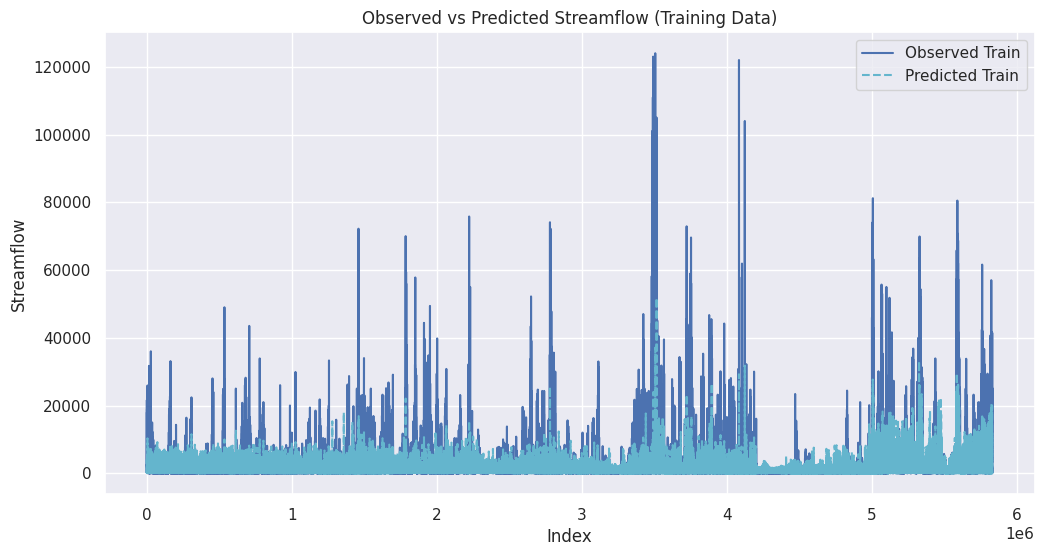

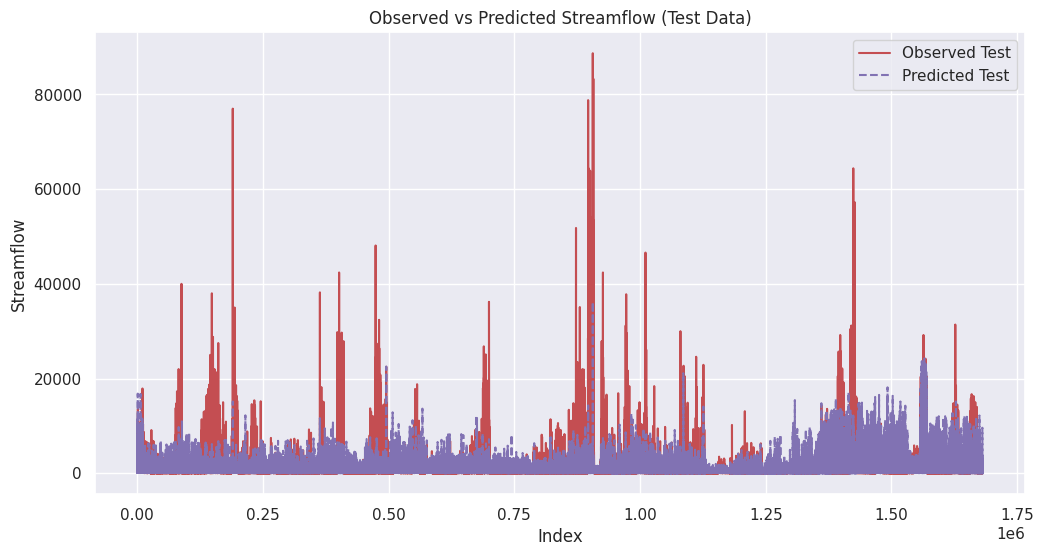

In [ ]:
# Plot the observed vs predicted values for the training data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Observed Train', color='b')
plt.plot(range(len(y_train)), y_train_pred, label='Predicted Train', color='c', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Streamflow')
plt.title('Observed vs Predicted Streamflow (Training Data)')
plt.show()

# Plot the observed vs predicted values for the test data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Observed Test', color='r')
plt.plot(range(len(y_test)), y_test_pred, label='Predicted Test', color='m', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Streamflow')
plt.title('Observed vs Predicted Streamflow (Test Data)')
plt.show()

##Each site sperately

Train/test scores for individual sites:
Promt: I would like to get scores for the train and test for individual sites separately. Then plot the scores (R2).

In [ ]:
# Define features and target
features = ['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']
target = ['streamflow']

# Initialize the StandardScaler
scaler_X = StandardScaler()

# Fit the scaler on the entire training data
scaler_X.fit(train_df[features])

# Create the Linear Regression model
model = LinearRegression()

# Fit the model on the entire training data
model.fit(scaler_X.transform(train_df[features]), train_df[target].values.ravel())

# Function to perform feature engineering, prediction, and scoring for each site
def process_site(gauge_id, df, model, features, target, scaler):
    X_site = df[df['gauge_id'] == gauge_id][features]
    y_site = df[df['gauge_id'] == gauge_id][target]
    X_site_scaled = scaler.transform(X_site)
    y_site_pred = model.predict(X_site_scaled)
    r2 = r2_score(y_site, y_site_pred)
    return r2

In [ ]:
# Initialize dictionaries to store R² scores for each site
train_r2_scores = {}
test_r2_scores = {}

# Get the unique gauge_ids in the train and test sets
train_gauge_ids = train_df['gauge_id'].unique()
test_gauge_ids = test_df['gauge_id'].unique()

# Process each site in the training set
for gauge_id in train_gauge_ids:
    train_r2_scores[gauge_id] = process_site(gauge_id, train_df, model, features, target, scaler_X)

# Process each site in the test set
for gauge_id in test_gauge_ids:
    test_r2_scores[gauge_id] = process_site(gauge_id, test_df, model, features, target, scaler_X)

In [ ]:
# Convert the scores to DataFrames for easy reporting
train_r2_df = pd.DataFrame(list(train_r2_scores.items()), columns=['gauge_id', 'train_r2'])
test_r2_df = pd.DataFrame(list(test_r2_scores.items()), columns=['gauge_id', 'test_r2'])

# Print the resulting DataFrames
print("Training R² scores:")
print(train_r2_df)
print("\nTest R² scores:")
print(test_r2_df)

Training R² scores:
     gauge_id     train_r2
0     1013500    -0.314987
1     1031500     0.115437
2     1047000     0.070328
3     1054200    -0.622730
4     1055000    -0.450217
..        ...          ...
465  14309500    -0.690267
466  14316700     0.379056
467  14325000     0.536914
468  14362250 -1982.988979
469  14400000     0.153452

[470 rows x 2 columns]

Test R² scores:
     gauge_id      test_r2
0     1022500     0.004428
1     1030500    -0.405901
2     1052500    -0.409678
3     1078000    -1.715408
4     1123000   -32.050221
..        ...          ...
131  14138800  -125.576160
132  14138870  -578.069280
133  14139800   -44.367182
134  14154500     0.446830
135  14303200 -2069.536290

[136 rows x 2 columns]


In [ ]:
train_r2_df = train_r2_df.sort_values(by='train_r2', ascending=False)
test_r2_df = test_r2_df.sort_values(by='test_r2', ascending=False)

top_20_train = train_r2_df.head(20)
top_20_test = test_r2_df.head(20)

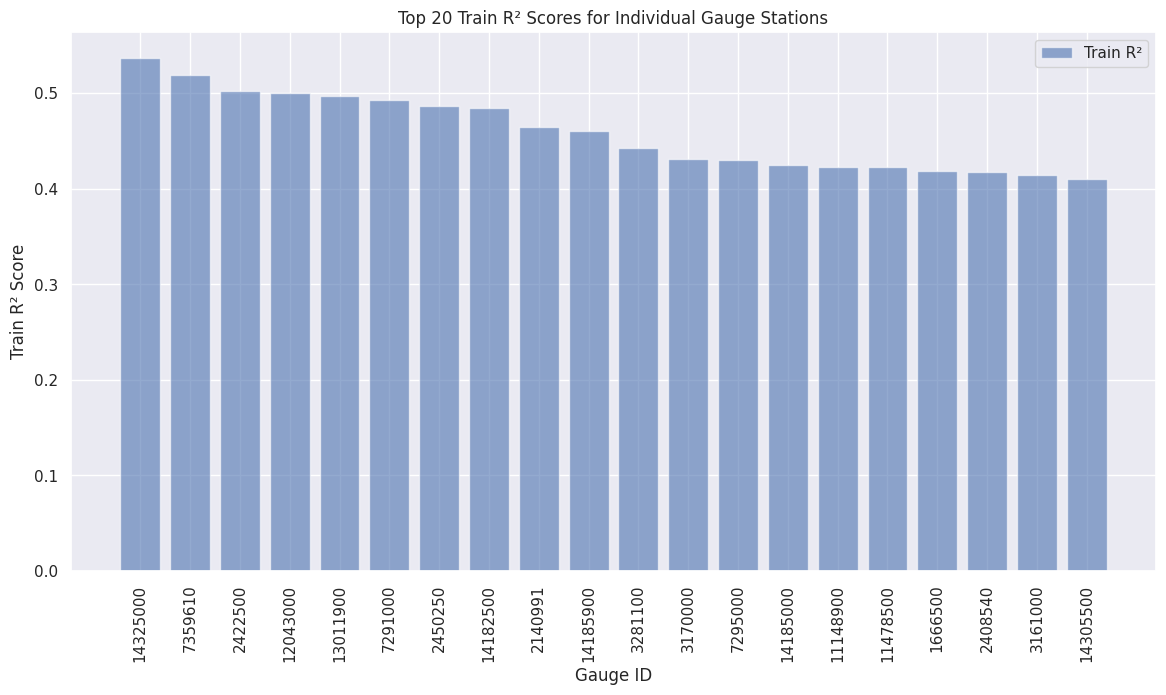

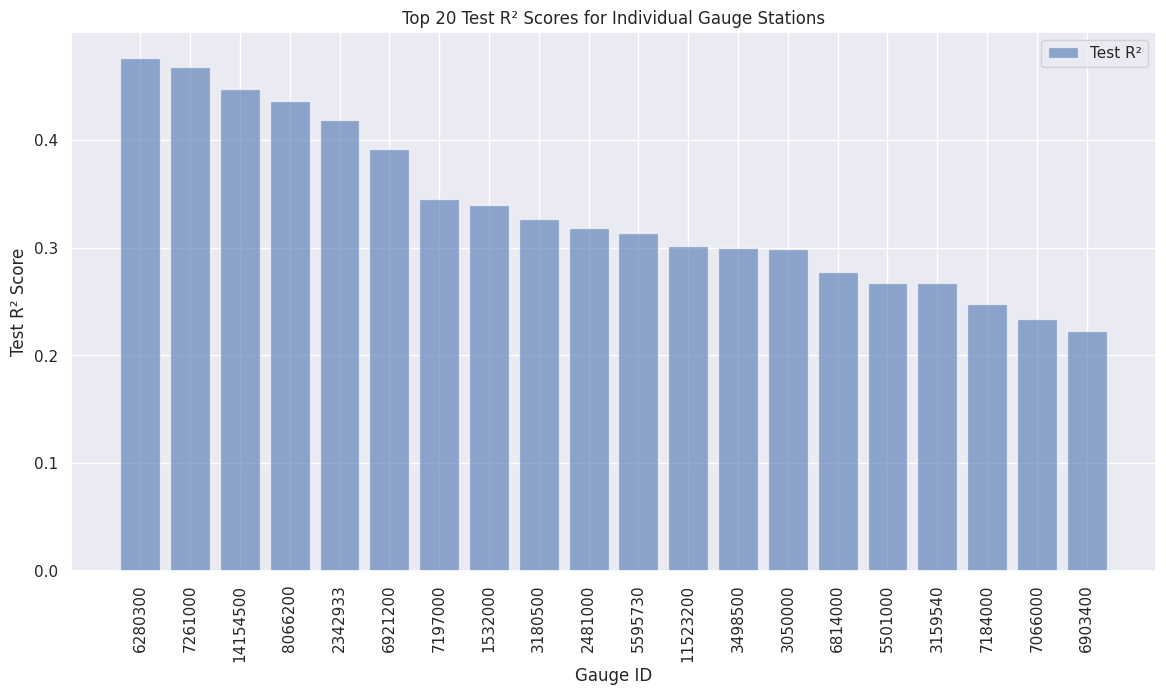

In [ ]:
# Plot the top 20 R² scores for the training set
plt.figure(figsize=(14, 7))
plt.bar(top_20_train['gauge_id'].astype(str), top_20_train['train_r2'], alpha=0.6, label='Train R²')
plt.xlabel('Gauge ID')
plt.ylabel('Train R² Score')
plt.title('Top 20 Train R² Scores for Individual Gauge Stations')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the top 20 R² scores for the test set
plt.figure(figsize=(14, 7))
plt.bar(top_20_test['gauge_id'].astype(str), top_20_test['test_r2'], alpha=0.6, label='Test R²')
plt.xlabel('Gauge ID')
plt.ylabel('Test R² Score')
plt.title('Top 20 Test R² Scores for Individual Gauge Stations')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Strength in each site: Train/test separately within each site. Firt 80% train and rest 20% test.


Overfitting/underfitting:
Train score and test scores difference

Train with ten staions

In [ ]:
# List of gauge IDs to process
gauge_ids = [1144000, 2143040, 2177000, 3504000, 6632400, 6903400, 7362100, 10234500, 14185900, 14222500]

# Define the Random Forest regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True
)

# Function to train and evaluate the model for a given gauge_id
def train_and_evaluate_rf(gauge_id, df):
    data = df[df['gauge_id'] == gauge_id].copy()

    # Check if there are enough data points
    if len(data) < 2:
        print(f"Not enough data for gauge ID: {gauge_id}")
        return

    # Prepare the features and target
    X = data[['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']]
    y = data['streamflow']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate scores
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the scores
    print(f"Gauge ID: {gauge_id}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

# Process each gauge ID
for gauge_id in gauge_ids:
    train_and_evaluate_rf(gauge_id, df)

Gauge ID: 1144000
Mean Squared Error: 1525143.8066177466
R-squared: 0.42726557412218313

Gauge ID: 2143040
Mean Squared Error: 2132.6397992011084
R-squared: 0.5278114416555506

Gauge ID: 2177000
Mean Squared Error: 254560.6793362194
R-squared: 0.38439871989960817

Gauge ID: 3504000
Mean Squared Error: 18738.413494516895
R-squared: 0.4200885520162351

Gauge ID: 6632400
Mean Squared Error: 10800.75020490745
R-squared: 0.6544448849968527

Gauge ID: 6903400
Mean Squared Error: 131453.2772417523
R-squared: 0.21246581536308096

Gauge ID: 7362100
Mean Squared Error: 1352744.7942384405
R-squared: 0.11594182275036313

Gauge ID: 10234500
Mean Squared Error: 2241.7604639698748
R-squared: 0.6128034955829476

Gauge ID: 14185900
Mean Squared Error: 311903.51242810447
R-squared: 0.6382384972714565

Gauge ID: 14222500
Mean Squared Error: 283236.09809213266
R-squared: 0.6519245379065075



Gauge ID: 1144000
Mean Squared Error: 1483373.6991649375
R-squared: 0.47563962917441716



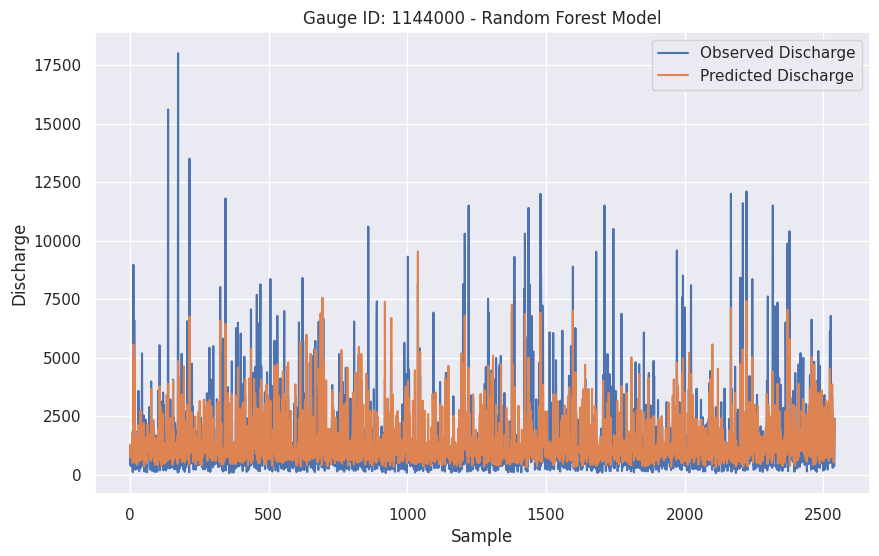

Gauge ID: 2143040
Mean Squared Error: 2058.313400161084
R-squared: 0.49335628464171033



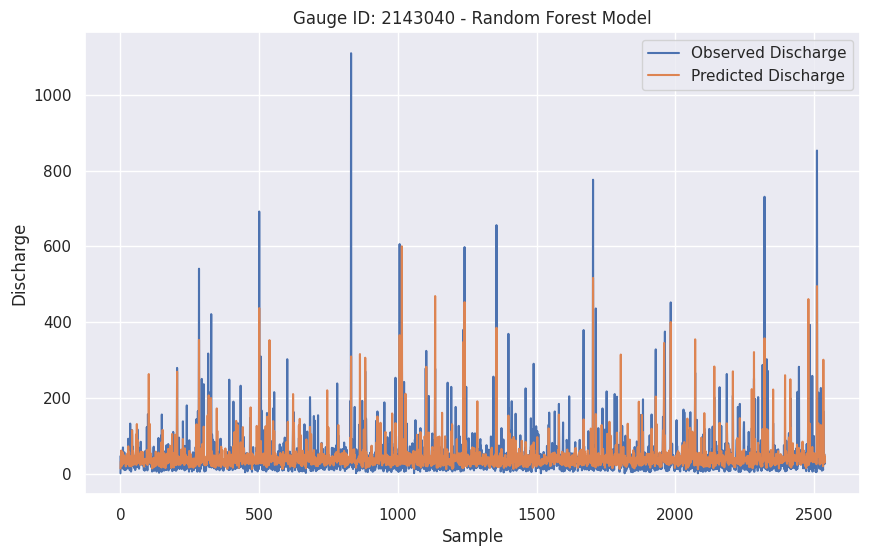

Gauge ID: 2177000
Mean Squared Error: 128754.2901805614
R-squared: 0.4258096493944501



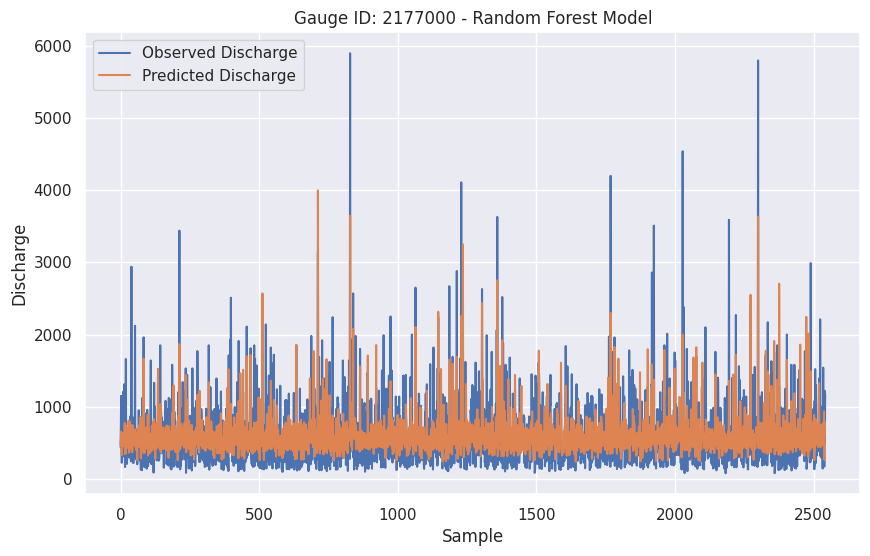

Gauge ID: 3504000
Mean Squared Error: 12949.192070398009
R-squared: 0.433367667264974



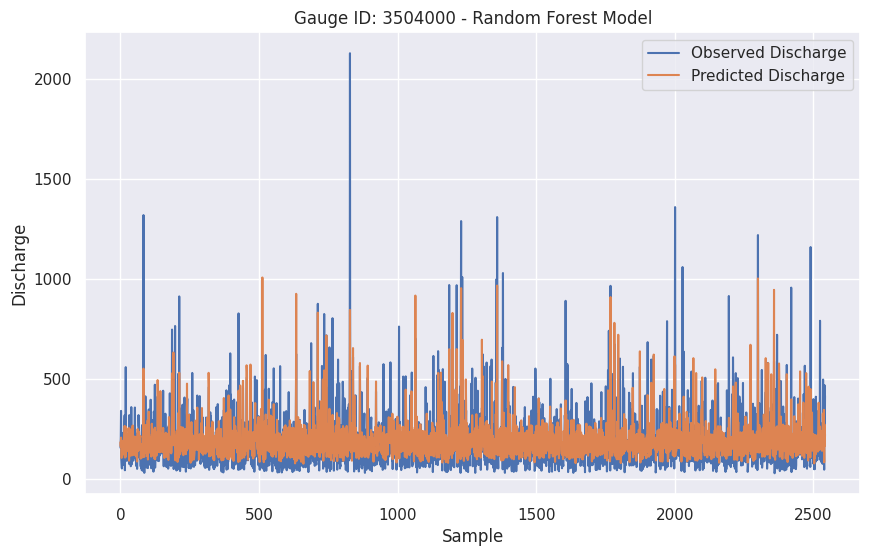

Gauge ID: 6632400
Mean Squared Error: 10277.300720228557
R-squared: 0.6519790270578489



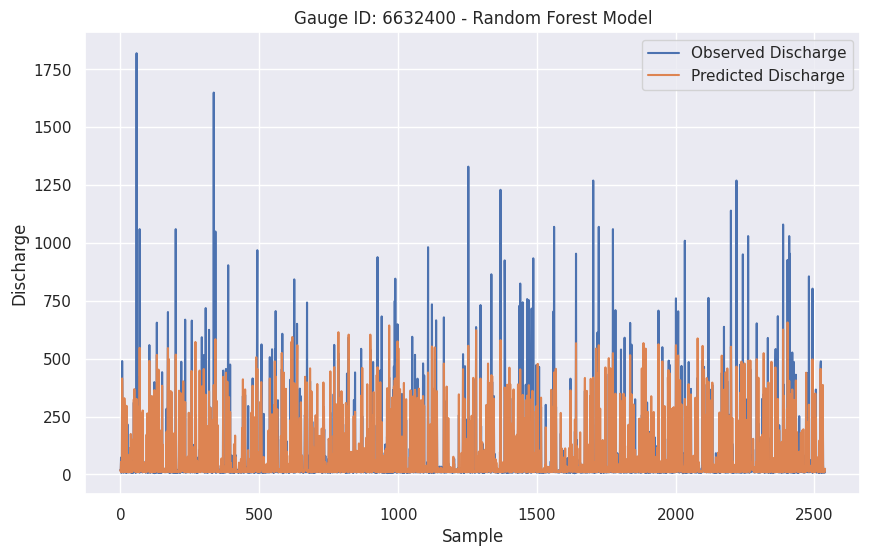

Gauge ID: 6903400
Mean Squared Error: 317600.9017034574
R-squared: 0.28320568168755034



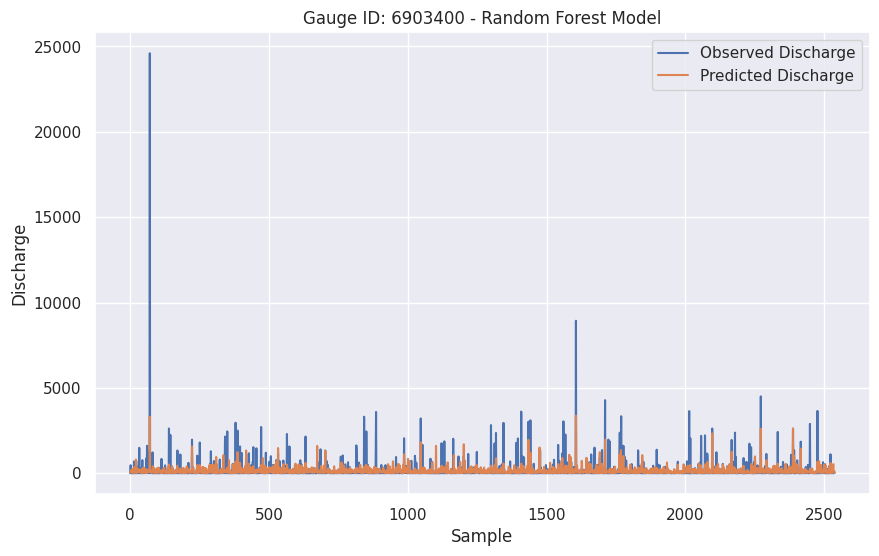

Gauge ID: 7362100
Mean Squared Error: 958529.4528337821
R-squared: 0.07049022093897028



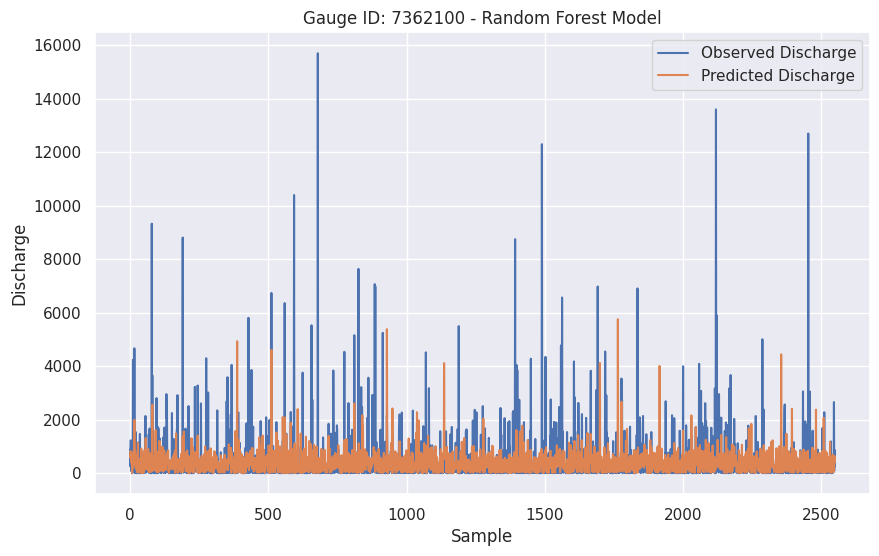

Gauge ID: 10234500
Mean Squared Error: 2248.582824101968
R-squared: 0.6116251386454081



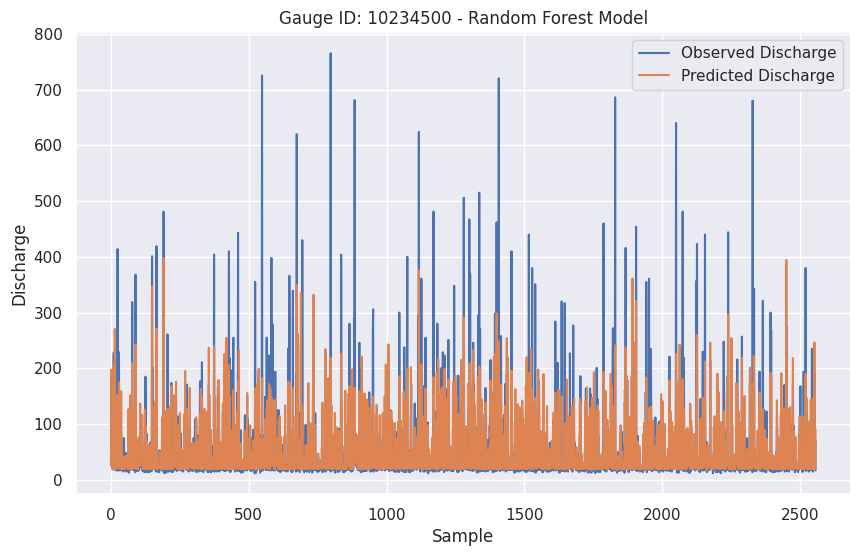

Gauge ID: 14185900
Mean Squared Error: 312344.2677266896
R-squared: 0.637727286936214



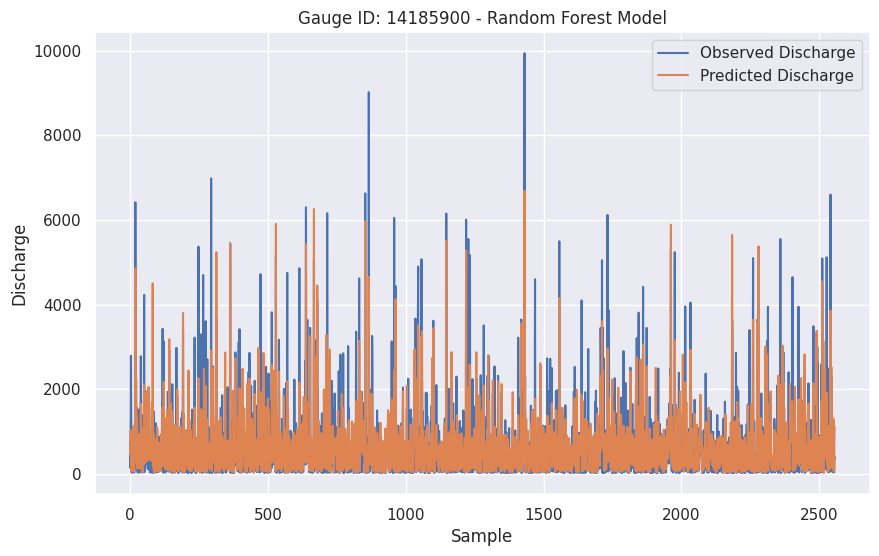

Gauge ID: 14222500
Mean Squared Error: 283151.4813146815
R-squared: 0.6520285254423851



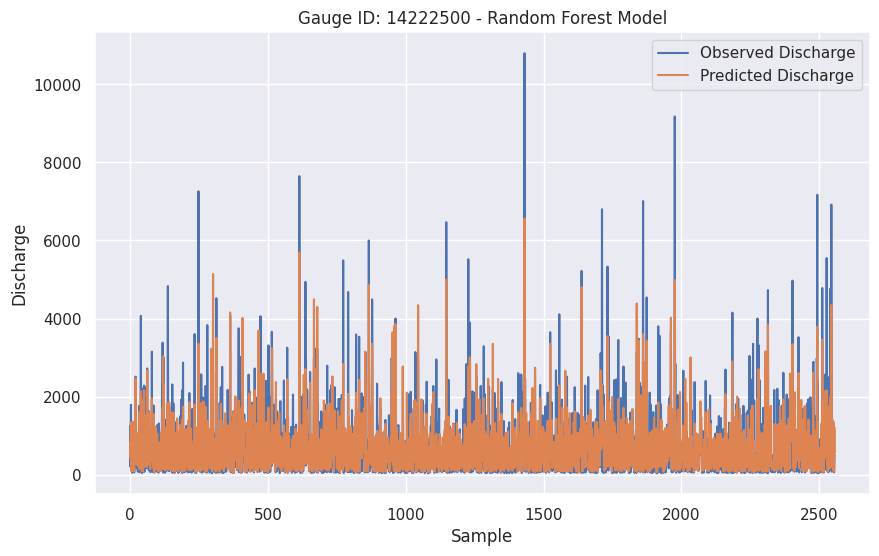

In [ ]:
# List of gauge IDs to process
gauge_ids = [1144000, 2143040, 2177000, 3504000, 6632400, 6903400, 7362100, 10234500, 14185900, 14222500]

# Define the Random Forest regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True
)

# Function to train and evaluate the model for a given gauge_id
def train_and_evaluate_rf(gauge_id, df):
    data = df[df['gauge_id'] == gauge_id].copy()

    # Check if there are enough data points
    if len(data) < 2:
        print(f"Not enough data for gauge ID: {gauge_id}")
        return

    # Prepare the features and target
    X = data[['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']]
    y = data['streamflow']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate scores
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the scores
    print(f"Gauge ID: {gauge_id}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Observed Discharge')
    plt.plot(y_pred, label='Predicted Discharge')
    plt.xlabel('Sample')
    plt.ylabel('Discharge')
    plt.title(f'Gauge ID: {gauge_id} - Random Forest Model')
    plt.legend()
    plt.show()

# Process each gauge ID
for gauge_id in gauge_ids:
    train_and_evaluate_rf(gauge_id, df)

Test scores for new unseen five stations

##Train/test within sites

In [23]:
# In the following code, modify it to also make a dataset with the gauge_id, datetime, actual and predicted streamflow. All
# other existing things should stay in the code.

# <# ✅ Function to calculate NSE and PBIAS
# def calculate_nse(y_true, y_pred):
#     return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

# def calculate_pbias(y_true, y_pred):
#     return 100 * np.sum(y_true - y_pred) / np.sum(y_true)

# # ✅ Function to process a batch of gauge stations using Random Forest
# def process_gauges_individually_RF(df, gauge_ids_batch):
#     metrics = []

#     for gauge_id in gauge_ids_batch:
#         # Filter data for the current site
#         site_data = df[df['gauge_id'] == gauge_id]

#         # Split into 80% training and 20% testing
#         split_index = int(len(site_data) * 0.8)
#         train_site_data = site_data.iloc[:split_index]
#         test_site_data = site_data.iloc[split_index:]

#         # Initialize StandardScaler and Random Forest Regressor
#         scaler_X = StandardScaler()
#         model = RandomForestRegressor(
#             n_estimators=50,         # Increased trees for better stability
#             min_samples_split=5,
#             min_samples_leaf=2,
#             max_features='sqrt',
#             max_depth=5,             # Slightly deeper trees for balance
#             bootstrap=True,
#             random_state=42
#         )

#         # Scale the features based on the training data
#         X_train_scaled = scaler_X.fit_transform(train_site_data[features])
#         X_test_scaled = scaler_X.transform(test_site_data[features])

#         # Extract target variable
#         y_train = train_site_data[target].values.ravel()
#         y_test = test_site_data[target].values.ravel()

#         # Fit the model on the training data
#         model.fit(X_train_scaled, y_train)

#         # Predict on training and testing data
#         y_train_pred = model.predict(X_train_scaled)
#         y_test_pred = model.predict(X_test_scaled)

#         # Compute evaluation metrics
#         train_r2 = r2_score(y_train, y_train_pred)
#         test_r2 = r2_score(y_test, y_test_pred)
#         train_mse = mean_squared_error(y_train, y_train_pred)
#         test_mse = mean_squared_error(y_test, y_test_pred)
#         train_rmse = np.sqrt(train_mse)
#         test_rmse = np.sqrt(test_mse)
#         train_mae = mean_absolute_error(y_train, y_train_pred)
#         test_mae = mean_absolute_error(y_test, y_test_pred)
#         train_nse = calculate_nse(y_train, y_train_pred)
#         test_nse = calculate_nse(y_test, y_test_pred)
#         train_pbias = calculate_pbias(y_train, y_train_pred)
#         test_pbias = calculate_pbias(y_test, y_test_pred)

#         # Store the results
#         metrics.append({
#             'gauge_id': gauge_id,
#             'train_r2': train_r2, 'test_r2': test_r2,
#             'train_rmse': train_rmse, 'test_rmse': test_rmse,
#             'train_mse': train_mse, 'test_mse': test_mse,
#             'train_mae': train_mae, 'test_mae': test_mae,
#             'train_nse': train_nse, 'test_nse': test_nse,
#             'train_pbias': train_pbias, 'test_pbias': test_pbias
#         })

#         print(f"Gauge ID: {gauge_id} processed successfully.")

#     return pd.DataFrame(metrics)

# # ✅ Function to process gauge stations in chunks
# def process_gauges_in_chunks_RF(df, start_idx=0, chunk_size=30, results_file='RF_results.csv'):
#     try:
#         results_df = pd.read_csv(results_file)
#     except FileNotFoundError:
#         results_df = pd.DataFrame(columns=['gauge_id', 'train_r2', 'test_r2', 'train_rmse', 'test_rmse',
#                                            'train_mse', 'test_mse', 'train_mae', 'test_mae', 'train_nse',
#                                            'test_nse', 'train_pbias', 'test_pbias'])

#     unique_gauge_ids = df['gauge_id'].unique()
#     total_gauges = len(unique_gauge_ids)

#     gauge_ids_batch = unique_gauge_ids[start_idx:start_idx + chunk_size]
#     print(f"Processing gauge stations {start_idx + 1} to {min(start_idx + chunk_size, total_gauges)}...")

#     df_subset = df[df['gauge_id'].isin(gauge_ids_batch)]
#     metrics_df = process_gauges_individually_RF(df_subset, gauge_ids_batch)

#     results_df = pd.concat([results_df, metrics_df], ignore_index=True)
#     results_df.to_csv(results_file, index=False)

#     print("Results saved to", results_file)

# # ✅ Example usage:
# features = ['prcp', 'srad', 'tmax']  # Modified feature selection
# target = ['streamflow']

# process_gauges_in_chunks_RF(df, start_idx=49, chunk_size=674)>







import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/drive/My Drive/CAMEL_ML_internal/camel_ml_df.csv")
df['date'] = pd.to_datetime(df['date'])  # Ensure date column is in datetime format

# Function to calculate NSE and PBIAS
def calculate_nse(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

def calculate_pbias(y_true, y_pred):
    return 100 * np.sum(y_true - y_pred) / np.sum(y_true)

# Function to process a batch of gauge stations using Random Forest
def process_gauges_individually_RF(df, gauge_ids_batch):
    metrics = []
    predictions = []  # Store predictions with gauge_id and date

    for gauge_id in gauge_ids_batch:
        # Filter data for the current site
        site_data = df[df['gauge_id'] == gauge_id]

        # Split into 80% training and 20% testing
        split_index = int(len(site_data) * 0.8)
        train_site_data = site_data.iloc[:split_index]
        test_site_data = site_data.iloc[split_index:]

        # Initialize StandardScaler and Random Forest Regressor
        scaler_X = StandardScaler()
        model = RandomForestRegressor(
            n_estimators=50,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            max_depth=5,
            bootstrap=True,
            random_state=42
        )

        # Scale the features based on the training data
        X_train_scaled = scaler_X.fit_transform(train_site_data[features])
        X_test_scaled = scaler_X.transform(test_site_data[features])

        # Extract target variable
        y_train = train_site_data[target].values.ravel()
        y_test = test_site_data[target].values.ravel()

        # Fit the model on the training data
        model.fit(X_train_scaled, y_train)

        # Predict on training and testing data
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Compute evaluation metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_nse = calculate_nse(y_train, y_train_pred)
        test_nse = calculate_nse(y_test, y_test_pred)
        train_pbias = calculate_pbias(y_train, y_train_pred)
        test_pbias = calculate_pbias(y_test, y_test_pred)

        # Store the results
        metrics.append({
            'gauge_id': gauge_id,
            'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse,
            'train_mse': train_mse, 'test_mse': test_mse,
            'train_mae': train_mae, 'test_mae': test_mae,
            'train_nse': train_nse, 'test_nse': test_nse,
            'train_pbias': train_pbias, 'test_pbias': test_pbias
        })

        # Store actual vs predicted streamflow for train and test sets
        train_results = pd.DataFrame({
            'gauge_id': gauge_id,
            'date': train_site_data['date'],
            'actual_streamflow': y_train,
            'predicted_streamflow': y_train_pred
        })

        test_results = pd.DataFrame({
            'gauge_id': gauge_id,
            'date': test_site_data['date'],
            'actual_streamflow': y_test,
            'predicted_streamflow': y_test_pred
        })

        predictions.append(train_results)
        predictions.append(test_results)

        print(f"Gauge ID: {gauge_id} processed successfully.")

    return pd.DataFrame(metrics), pd.concat(predictions, ignore_index=True)

# Function to process gauge stations in chunks and save results with dynamic filenames
def process_gauges_in_chunks_RF(df, start_idx=0, chunk_size=30, results_dir='/content/drive/My Drive/CAMEL_ML_internal/'):
    unique_gauge_ids = df['gauge_id'].unique()
    total_gauges = len(unique_gauge_ids)

    # Determine the range of gauge IDs for the filenames
    start_gauge_id = unique_gauge_ids[start_idx]
    end_gauge_id = unique_gauge_ids[min(start_idx + chunk_size - 1, total_gauges - 1)]

    # Define file names dynamically based on gauge ID range
    results_file = os.path.join(results_dir, f'RF_scores_{start_gauge_id}_{end_gauge_id}.csv')
    predictions_file = os.path.join(results_dir, f'RF_predictions_{start_gauge_id}_{end_gauge_id}.csv')

    # Try loading existing results if they exist
    try:
        results_df = pd.read_csv(results_file)
    except FileNotFoundError:
        results_df = pd.DataFrame(columns=['gauge_id', 'train_r2', 'test_r2', 'train_rmse', 'test_rmse',
                                           'train_mse', 'test_mse', 'train_mae', 'test_mae', 'train_nse',
                                           'test_nse', 'train_pbias', 'test_pbias'])

    try:
        predictions_df = pd.read_csv(predictions_file)
    except FileNotFoundError:
        predictions_df = pd.DataFrame(columns=['gauge_id', 'date', 'actual_streamflow', 'predicted_streamflow'])

    # Select gauge stations for processing
    gauge_ids_batch = unique_gauge_ids[start_idx:start_idx + chunk_size]
    print(f"Processing gauge stations {start_idx + 1} to {min(start_idx + chunk_size, total_gauges)}...")

    df_subset = df[df['gauge_id'].isin(gauge_ids_batch)]
    metrics_df, pred_df = process_gauges_individually_RF(df_subset, gauge_ids_batch)

    # Append results and save
    results_df = pd.concat([results_df, metrics_df], ignore_index=True)
    predictions_df = pd.concat([predictions_df, pred_df], ignore_index=True)

    results_df.to_csv(results_file, index=False)
    predictions_df.to_csv(predictions_file, index=False)

    print(f"Results saved to {results_file}")
    print(f"Predictions saved to {predictions_file}")

# Example usage
features = ['dayl', 'prcp', 'srad', 'tmax', 'tmin', 'vp']
target = ['streamflow']

process_gauges_in_chunks_RF(df, start_idx=0, chunk_size=100)

Processing gauge stations 1 to 100...
Gauge ID: 1013500 processed successfully.
Gauge ID: 1022500 processed successfully.
Gauge ID: 1030500 processed successfully.
Gauge ID: 1031500 processed successfully.
Gauge ID: 1047000 processed successfully.
Gauge ID: 1052500 processed successfully.
Gauge ID: 1054200 processed successfully.
Gauge ID: 1055000 processed successfully.
Gauge ID: 1057000 processed successfully.
Gauge ID: 1073000 processed successfully.
Gauge ID: 1078000 processed successfully.
Gauge ID: 1118300 processed successfully.
Gauge ID: 1121000 processed successfully.
Gauge ID: 1123000 processed successfully.
Gauge ID: 1134500 processed successfully.
Gauge ID: 1137500 processed successfully.
Gauge ID: 1139000 processed successfully.
Gauge ID: 1139800 processed successfully.
Gauge ID: 1142500 processed successfully.
Gauge ID: 1144000 processed successfully.
Gauge ID: 1162500 processed successfully.
Gauge ID: 1169000 processed successfully.
Gauge ID: 1170100 processed successful

<ipython-input-23-88de4d6883ae>:255: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, metrics_df], ignore_index=True)
<ipython-input-23-88de4d6883ae>:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, pred_df], ignore_index=True)


Results saved to /content/drive/My Drive/CAMEL_ML_internal/RF_scores_1013500_2028500.csv
Predictions saved to /content/drive/My Drive/CAMEL_ML_internal/RF_predictions_1013500_2028500.csv


Prompt: Generate a point plot to compare the train and test R² scores across sites. Ensure that the x-axis does not display gauge IDs and that there are no connecting lines between the points. Limit the y-axis to a range of -1 to 1.

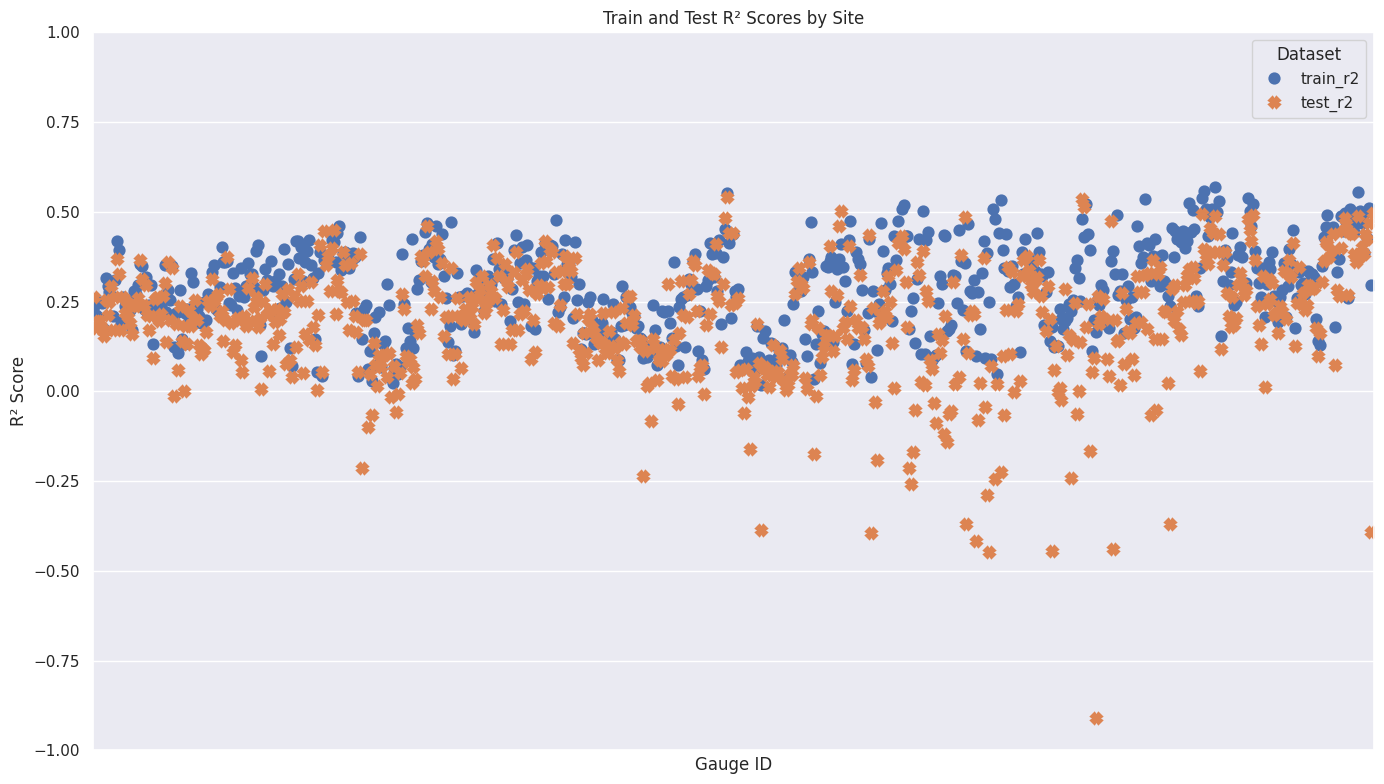

In [ ]:
# Merging the train and test R² scores into a single DataFrame for plotting
r2_scores_df = pd.merge(train_r2_df, test_r2_df, on='gauge_id')

# Melt the DataFrame to have a long-form structure suitable for seaborn's pointplot
r2_scores_long = pd.melt(r2_scores_df, id_vars='gauge_id', value_vars=['train_r2', 'test_r2'],
                         var_name='Dataset', value_name='R² Score')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a point plot without connecting lines
sns.pointplot(data=r2_scores_long, x='gauge_id', y='R² Score', hue='Dataset', markers=["o", "X"], linestyles="")

# Add labels and title
plt.xlabel('Gauge ID')
plt.ylabel('R² Score')
plt.title('Train and Test R² Scores by Site')

# Limit y-axis ticks
plt.ylim(-1, 1)

# Remove the x-axis gauge IDs for better readability
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

Prompt: Get the difference between the train and test scores for the sites and show plot.

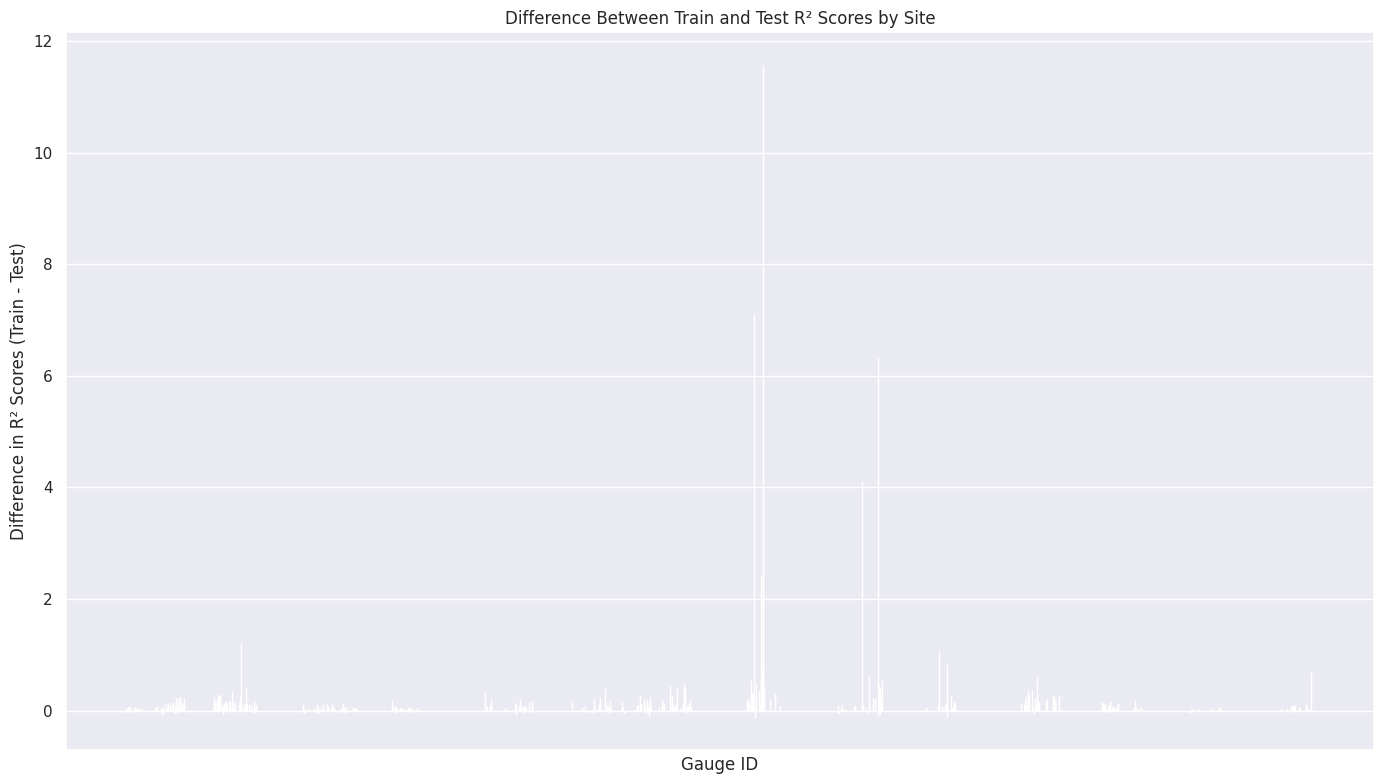

In [ ]:
# Merging the train and test R² scores into a single DataFrame for plotting
r2_scores_df = pd.merge(train_r2_df, test_r2_df, on='gauge_id')

# Calculate the difference between train and test R² scores for each site
r2_scores_df['r2_diff'] = r2_scores_df['train_r2'] - r2_scores_df['test_r2']

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot of the R² score differences with a distinct color using Matplotlib
plt.bar(r2_scores_df['gauge_id'], r2_scores_df['r2_diff'], color='red')

# Add labels and title
plt.xlabel('Gauge ID')
plt.ylabel('Difference in R² Scores (Train - Test)')
plt.title('Difference Between Train and Test R² Scores by Site')

# Limit y-axis from -1 to 2
# plt.ylim(-1, 2)

# Remove the x-axis gauge IDs for better readability
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

Bias:Variance: Overfit and underfit

In [ ]:
r2_scores_df = pd.merge(train_r2_df, test_r2_df, on='gauge_id')

# Calculate the difference between train and test R² scores for each site
r2_scores_df['r2_diff'] = r2_scores_df['train_r2'] - r2_scores_df['test_r2']

# Add a column for overfit/underfit classification
r2_scores_df['fit_status'] = r2_scores_df['r2_diff'].apply(lambda x: 'overfit' if x > 0 else 'underfit')

# Display the DataFrame with the new column
print(r2_scores_df)

     gauge_id  train_r2   test_r2   r2_diff fit_status
0     1013500  0.238260  0.263055 -0.024795   underfit
1     1022500  0.212777  0.175203  0.037574    overfit
2     1030500  0.207401  0.196766  0.010636    overfit
3     1031500  0.249598  0.195490  0.054107    overfit
4     1047000  0.245373  0.177100  0.068274    overfit
..        ...       ...       ...       ...        ...
669  14309500  0.495574  0.439453  0.056121    overfit
670  14316700  0.425912  0.424064  0.001848    overfit
671  14325000  0.511255  0.470210  0.041045    overfit
672  14362250  0.296974 -0.390311  0.687285    overfit
673  14400000  0.506212  0.497040  0.009172    overfit

[674 rows x 5 columns]


In [ ]:
# Count the occurrences of overfit and underfit
fit_counts = r2_scores_df['fit_status'].value_counts()

# Calculate the percentage of overfit and underfit
fit_percentages = r2_scores_df['fit_status'].value_counts(normalize=True) * 100

# Combine counts and percentages into a single DataFrame
fit_summary = pd.DataFrame({
    'Count': fit_counts,
    'Percentage (%)': fit_percentages
})

# Display the summary
print(fit_summary)

            Count  Percentage (%)
fit_status                       
overfit       582       86.350148
underfit       92       13.649852


In [ ]:
r2_scores_df

gauge_id  train_r2   test_r2   r2_diff fit_status
0     1013500  0.388553  0.388413  0.000140    overfit
1     1022500  0.242125  0.172902  0.069223    overfit
2     1030500  0.315715  0.307912  0.007803    overfit
3     1031500  0.303044  0.234469  0.068574    overfit
4     1047000  0.294240  0.253914  0.040326    overfit
..        ...       ...       ...       ...        ...
669  14309500  0.539099  0.481325  0.057774    overfit
670  14316700  0.469588  0.466364  0.003223    overfit
671  14325000  0.551836  0.485883  0.065953    overfit
672  14362250  0.307265 -0.243454  0.550719    overfit
673  14400000  0.541583  0.535762  0.005822    overfit

[674 rows x 5 columns]

#Spplementary

In [ ]:
first_100_gauge_ids = df['gauge_id'].unique()[:5]

df_100 = df[df['gauge_id'].isin(first_100_gauge_ids)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest regressor
model2 = RandomForestRegressor(n_estimators = 300, min_samples_split = 20, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)

#'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 300

# Train the model
model2.fit(X_train, y_train)

<ipython-input-15-ff3b8d4e40b9>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=300)

HP tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming df_100 is already defined and loaded with your data
# Extract features and target variable
features = ['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']
target = 'streamflow'  # Assuming 'streamflow' is the target column

X = df_100[features]
y = df_100[target]

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest regressor
model = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(best_params)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 300}


Model performance on train set

In [ ]:
# Make predictions on the train set
y_train_pred = model2.predict(X_train)

In [ ]:
# Calculate the R2 score
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score (train):", r2_train)

R2 Score (train): 0.09827227454865994


Model Performance on Test Set

In [ ]:
# Make predictions on the test set
y_test_pred = model2.predict(X_test)

In [ ]:
# Calculate the R2 score
r2_test = r2_score(y_test, y_test_pred)
print("R2 Score (test):", r2_test)

R2 Score (test): 0.10781016218237527


In [ ]:
y_test.shape

(1255353,)

In [ ]:
# Compute R2 score for the train set
r2 = r2_score(df['Original Data'], df['Predicted Data'])
print('The R2 for the train data is:', r2)

The R2 for the train data is: 0.8132848447400691


In [ ]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)

In [ ]:
B.shape

(4, 1)

In [ ]:
x = np.random.rand(4, 5)
y = np.sum(x, axis=1)

In [ ]:
# Assume 'df' is your DataFrame and it has already been split into train, dev, and test sets

# Convert gauge_id to categorical
df['gauge_id'] = df['gauge_id'].astype('category')

# Feature sets
features = ['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']
target = ['streamflow']

# Include 'gauge_id' as a feature for all data
X = df[features + ['gauge_id']]
y = df[target]

# Get all unique categories in the entire dataset for 'gauge_id'
all_gauge_ids = df['gauge_id'].unique()

# Define the ColumnTransformer with predefined categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),
        ('cat', OneHotEncoder(categories=[all_gauge_ids], drop='first'), ['gauge_id'])
    ])

# Define the Random Forest regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True,
    random_state=42
)

# Create a pipeline that includes the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training, validation, and test sets
# Assuming you already have train_df, dev_df, and test_df created based on your criteria
X_train = train_df[features + ['gauge_id']]
y_train = train_df[target]

X_val = dev_df[features + ['gauge_id']]
y_val = dev_df[target]

X_test = test_df[features + ['gauge_id']]
y_test = test_df[target]

# Train the model on the training set
pipeline.fit(X_train, y_train.values.ravel())

# Predict on the train and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Check predictions
print("Train predictions shape:", y_train_pred.shape)
print("Test predictions shape:", y_test_pred.shape)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")